# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
# In the context of the CRISP-DM framework, the task of identifying key drivers for used car prices can be reframed as a data 
# analysis problem as follows:

# The primary objective is to conduct an exploratory data analysis (EDA) on the dataset of 426K used cars to uncover trends, 
# patterns, and relationships. This involves statistical analysis and visualizations to understand the distribution and 
# characteristics of various features in the dataset, such as make, model, year, mileage, condition, and any other relevant
# attributes.

# In the data preparation phase of the CRISP-DM process, the focus is on cleaning, pre-processing, and transforming the dataset
# to make it suitable for analysis and modeling. This phase is crucial as the quality of data significantly affects the outcome
# of the analysis. The initial step involves cleaning the data, which includes identifying and handling missing or inconsistent
# entries, removing duplicates, and correcting any errors or anomalies in the dataset. This may also involve standardizing units
# of measurement and ensuring that categorical data is consistently labeled.

# In the modeling phase, the task progresses to predictive modeling, where the goal is to develop a regression model (or models)
# that can accurately predict the price of a used car based on its attributes. This involves selecting relevant features, 
# handling missing data, encoding categorical variables, and choosing an appropriate regression algorithm and associated
# hyper parameter.

# The final step is to interpret the results of the model, focusing on identifying which features are most influential in 
# determining used car prices. This will involve analyzing the model coefficients or feature importances to understand the 
# impact of different car attributes on their resale value.

# In the deployement phase, insights from the modeling are used to implement strategic used car dealer decisions.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
# This part involves exploring the dataset to understand its structure, quality, and the types of information it contains.
#
# STEP 1: Obtain a general sense of the size and content of the dataset. Determine the column that will serve as the target
# variable, and which columns will serve as inputs to the analysis.
#
# STEP 2: Obtain the data type of each column. Determine which columns are numerical and which are categorical. Dtermine the
# acceptable ranges for numerical values. Determine the number of unique values in each categorical column as well as the
# acceptable values for each column. Identify derived columns and/or data transformations that might be useful for the analysis.
#
# STEP 3: Assess the data quality. Determine if there are any duplicate entries, missing values, and inconsistencies between
# columns. Develop strategies for dealing with them. For example, misclassifications in one column can often be determined and
# corrected based on information in another column.
#
# STEP 4: Use scatter plots, histograms, and heat maps to get a sense of relationships between the columns. Develop strategies
# for transforming non-normal distributions, specifically with respect to the target variable. Identify opportunities for model
# simplification, particularly with respect to the numerical columns, which may have interdependencies as identified by principal
# componenents analysis.

In [29]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import warnings

from sklearn.utils           import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute          import SimpleImputer
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.linear_model    import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics         import mean_squared_error, r2_score, make_scorer
from sklearn.ensemble        import RandomForestRegressor
from sklearn.svm             import SVR
from sklearn.linear_model    import ElasticNet
from sklearn.preprocessing   import PolynomialFeatures

import matplotlib.pyplot as plt

df = pd.read_csv('used cars/data/vehicles.csv')
df.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [31]:
################################################################################################################################
#Determine the unique values for each column
################################################################################################################################
for col in df.columns:
    print(f"# of Unique values in '{col}':", df[col].nunique())
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

#--------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS AFTER RUNNING:
#--------------------------------------------------------------------------------------------------------------------------------
#'id', 'VIN', 'region', and 'state' columns contain information that is too specific for the purposes of this analysis.
#'model' column is too cluttered for practical use in the analysis. There are 29649 unique values in the 'model' column
#although the number of actual models is actually far fewer. The proliferation of unique values is caused by non-standard
#designations for the models. In theory, this could be cleaned up, but it's not practical for this analysis. All of the columns
#mentioned here will be dropped from the data set for the reasons already mentioned.

# of Unique values in 'id': 426880
Unique values in 'id':
[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]

# of Unique values in 'region': 404
Unique values in 'region':
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san die

# of Unique values in 'VIN': 118246
Unique values in 'VIN':
[nan '3GTP1VEC4EG551563' '1GCSCSE06AZ123805' ... '2HGES15535H620534'
 '1FDWF37P64EA24868' 'SAJGX2749VCOO8376']

# of Unique values in 'drive': 3
Unique values in 'drive':
[nan 'rwd' '4wd' 'fwd']

# of Unique values in 'size': 4
Unique values in 'size':
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']

# of Unique values in 'type': 13
Unique values in 'type':
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']

# of Unique values in 'paint_color': 12
Unique values in 'paint_color':
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']

# of Unique values in 'state': 51
Unique values in 'state':
['az' 'ar' 'fl' 'ma' 'nc' 'ny' 'or' 'pa' 'tx' 'wa' 'wi' 'al' 'ak' 'ca'
 'co' 'ct' 'dc' 'de' 'ga' 'hi' 'id' 'il' 'in' 'ia' 'ks' 'ky' 'la' 'me'
 'md' 'mi' 'mn' 'ms' 'mo' 'mt' 'ne' 'nv' 'nj' 'nm' 'nh' 'nd' 'oh' 'ok'
 'r

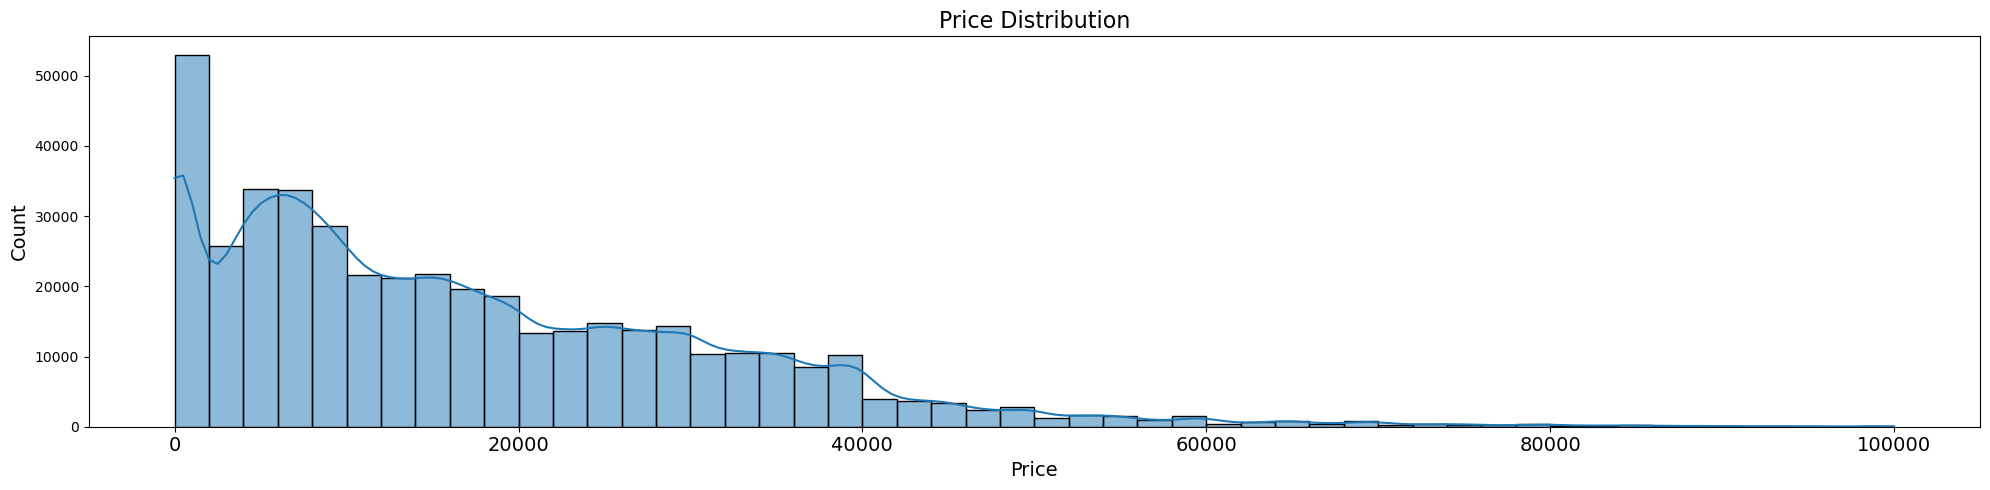

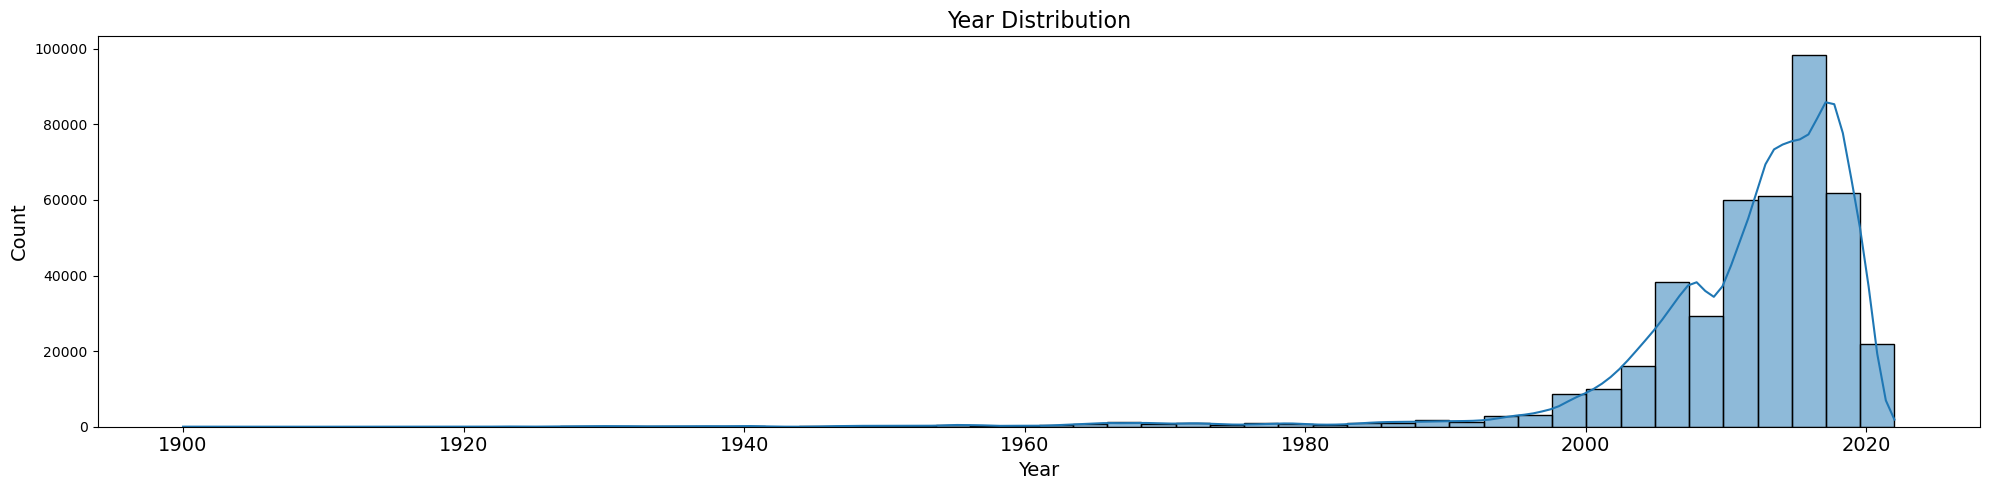

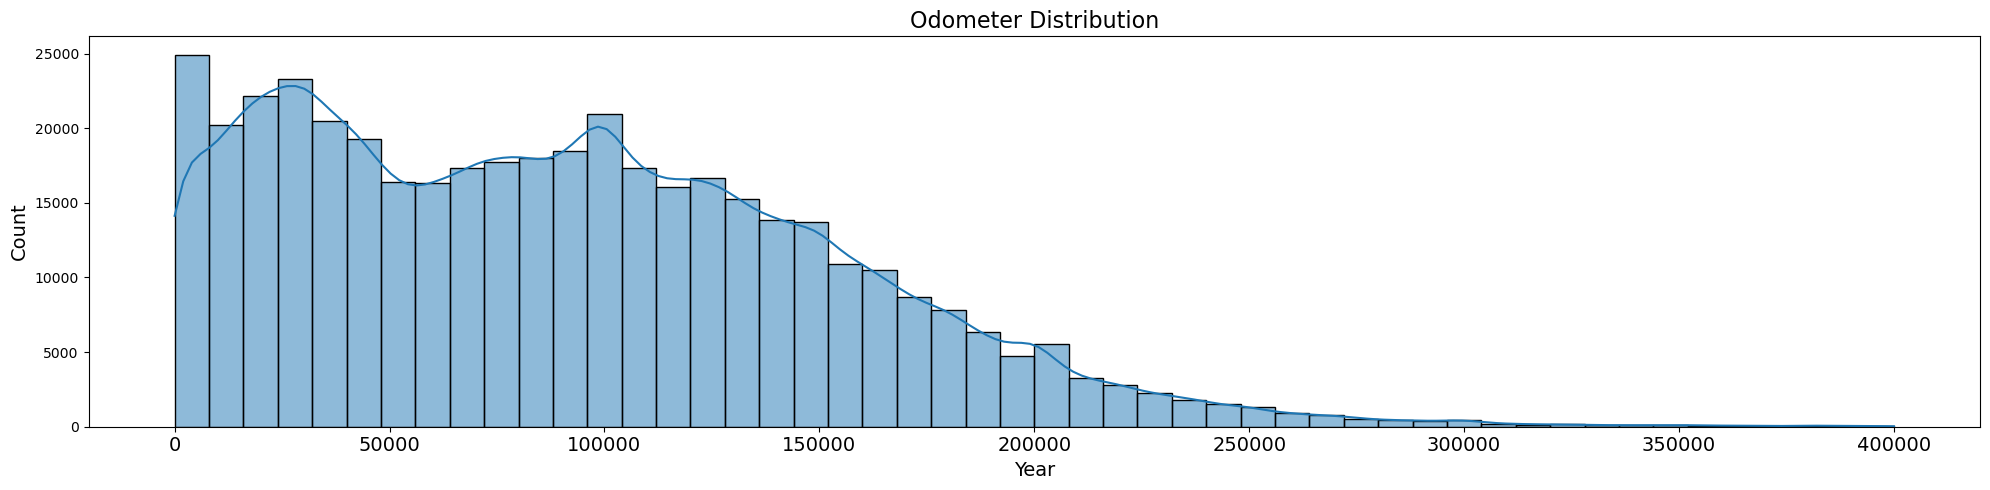

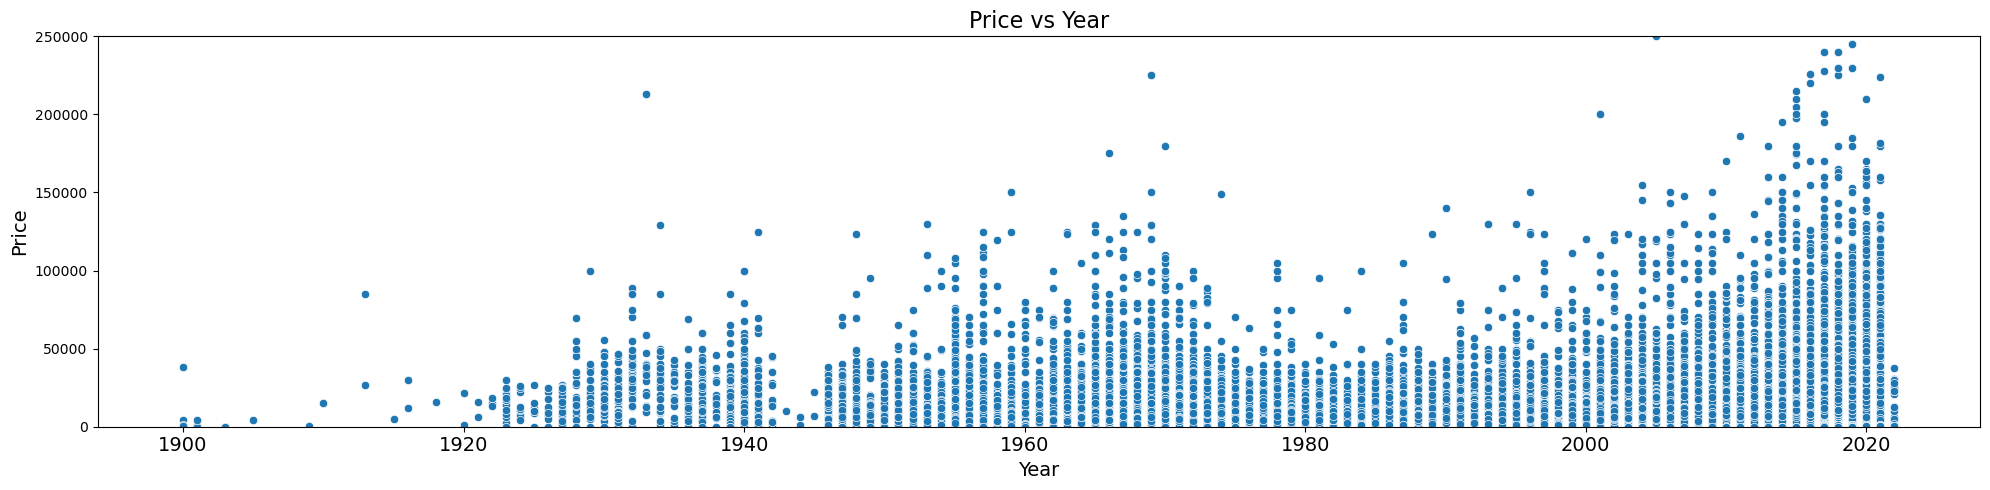

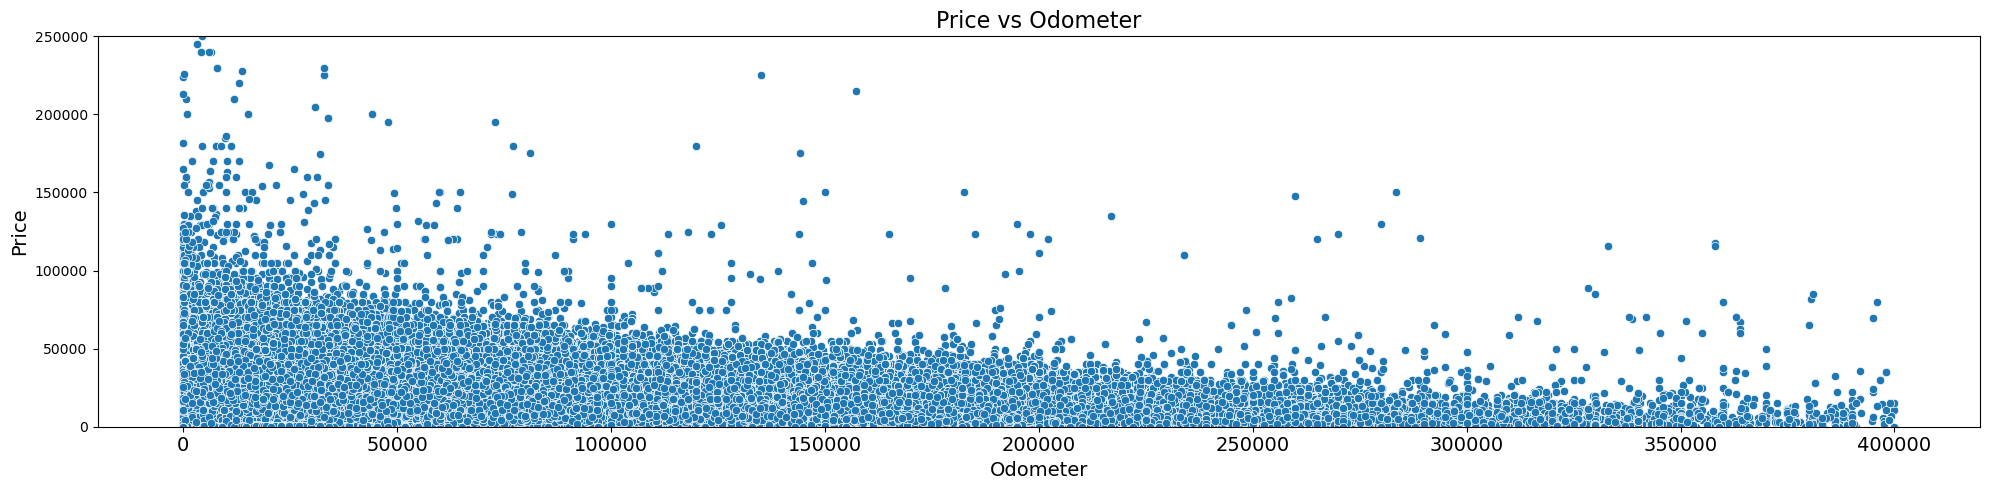


DONE


In [32]:
################################################################################################################################
# Produce Plots
################################################################################################################################

# Price Distribution
plt.figure(figsize=(20, 5))
sns.histplot(df[ df['price'] < 1e5 ]['price'], bins=50, kde=True)
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

# Year Distribution
plt.figure(figsize=(20, 5))
sns.histplot(df['year'], bins=50, kde=True)
plt.title('Year Distribution', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

# Odometer Distribution
plt.figure(figsize=(20, 5))
sns.histplot(df[ df['odometer'] < 0.4e6 ]['odometer'], bins=50, kde=True)
plt.title('Odometer Distribution', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

# Price vs Year
plt.figure(figsize=(20, 5))
sns.scatterplot(data=df, x='year', y='price')
plt.title('Price vs Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0, 0.25e6)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

# Price vs Odometer
plt.figure(figsize=(20, 5))
sns.scatterplot(data=df[ df['odometer'] < 0.4e6 ], x='odometer', y='price')
plt.title('Price vs Odometer', fontsize=16)
plt.xlabel('Odometer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0, 0.25e6)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

print()
print('DONE')

#-------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS AFTER RUNNING:
#-------------------------------------------------------------------------------------------------------------------------------

# The 'Price', 'Year', and 'Odometer' histograms are not normally distributed. Recommend using log(price) as the target for
# training models. Also, 'Price' has a complex relationship with 'Year'. It looks like vehicles over 30 years of age are valued
# differently than vehicles under 30 years of age. My analysis will focus on the 0 - 30 year range where the pricing dynamics
# is definitely more stright-forward. This will lead to a model that is better at accounting for the variance within that
# range restriction.

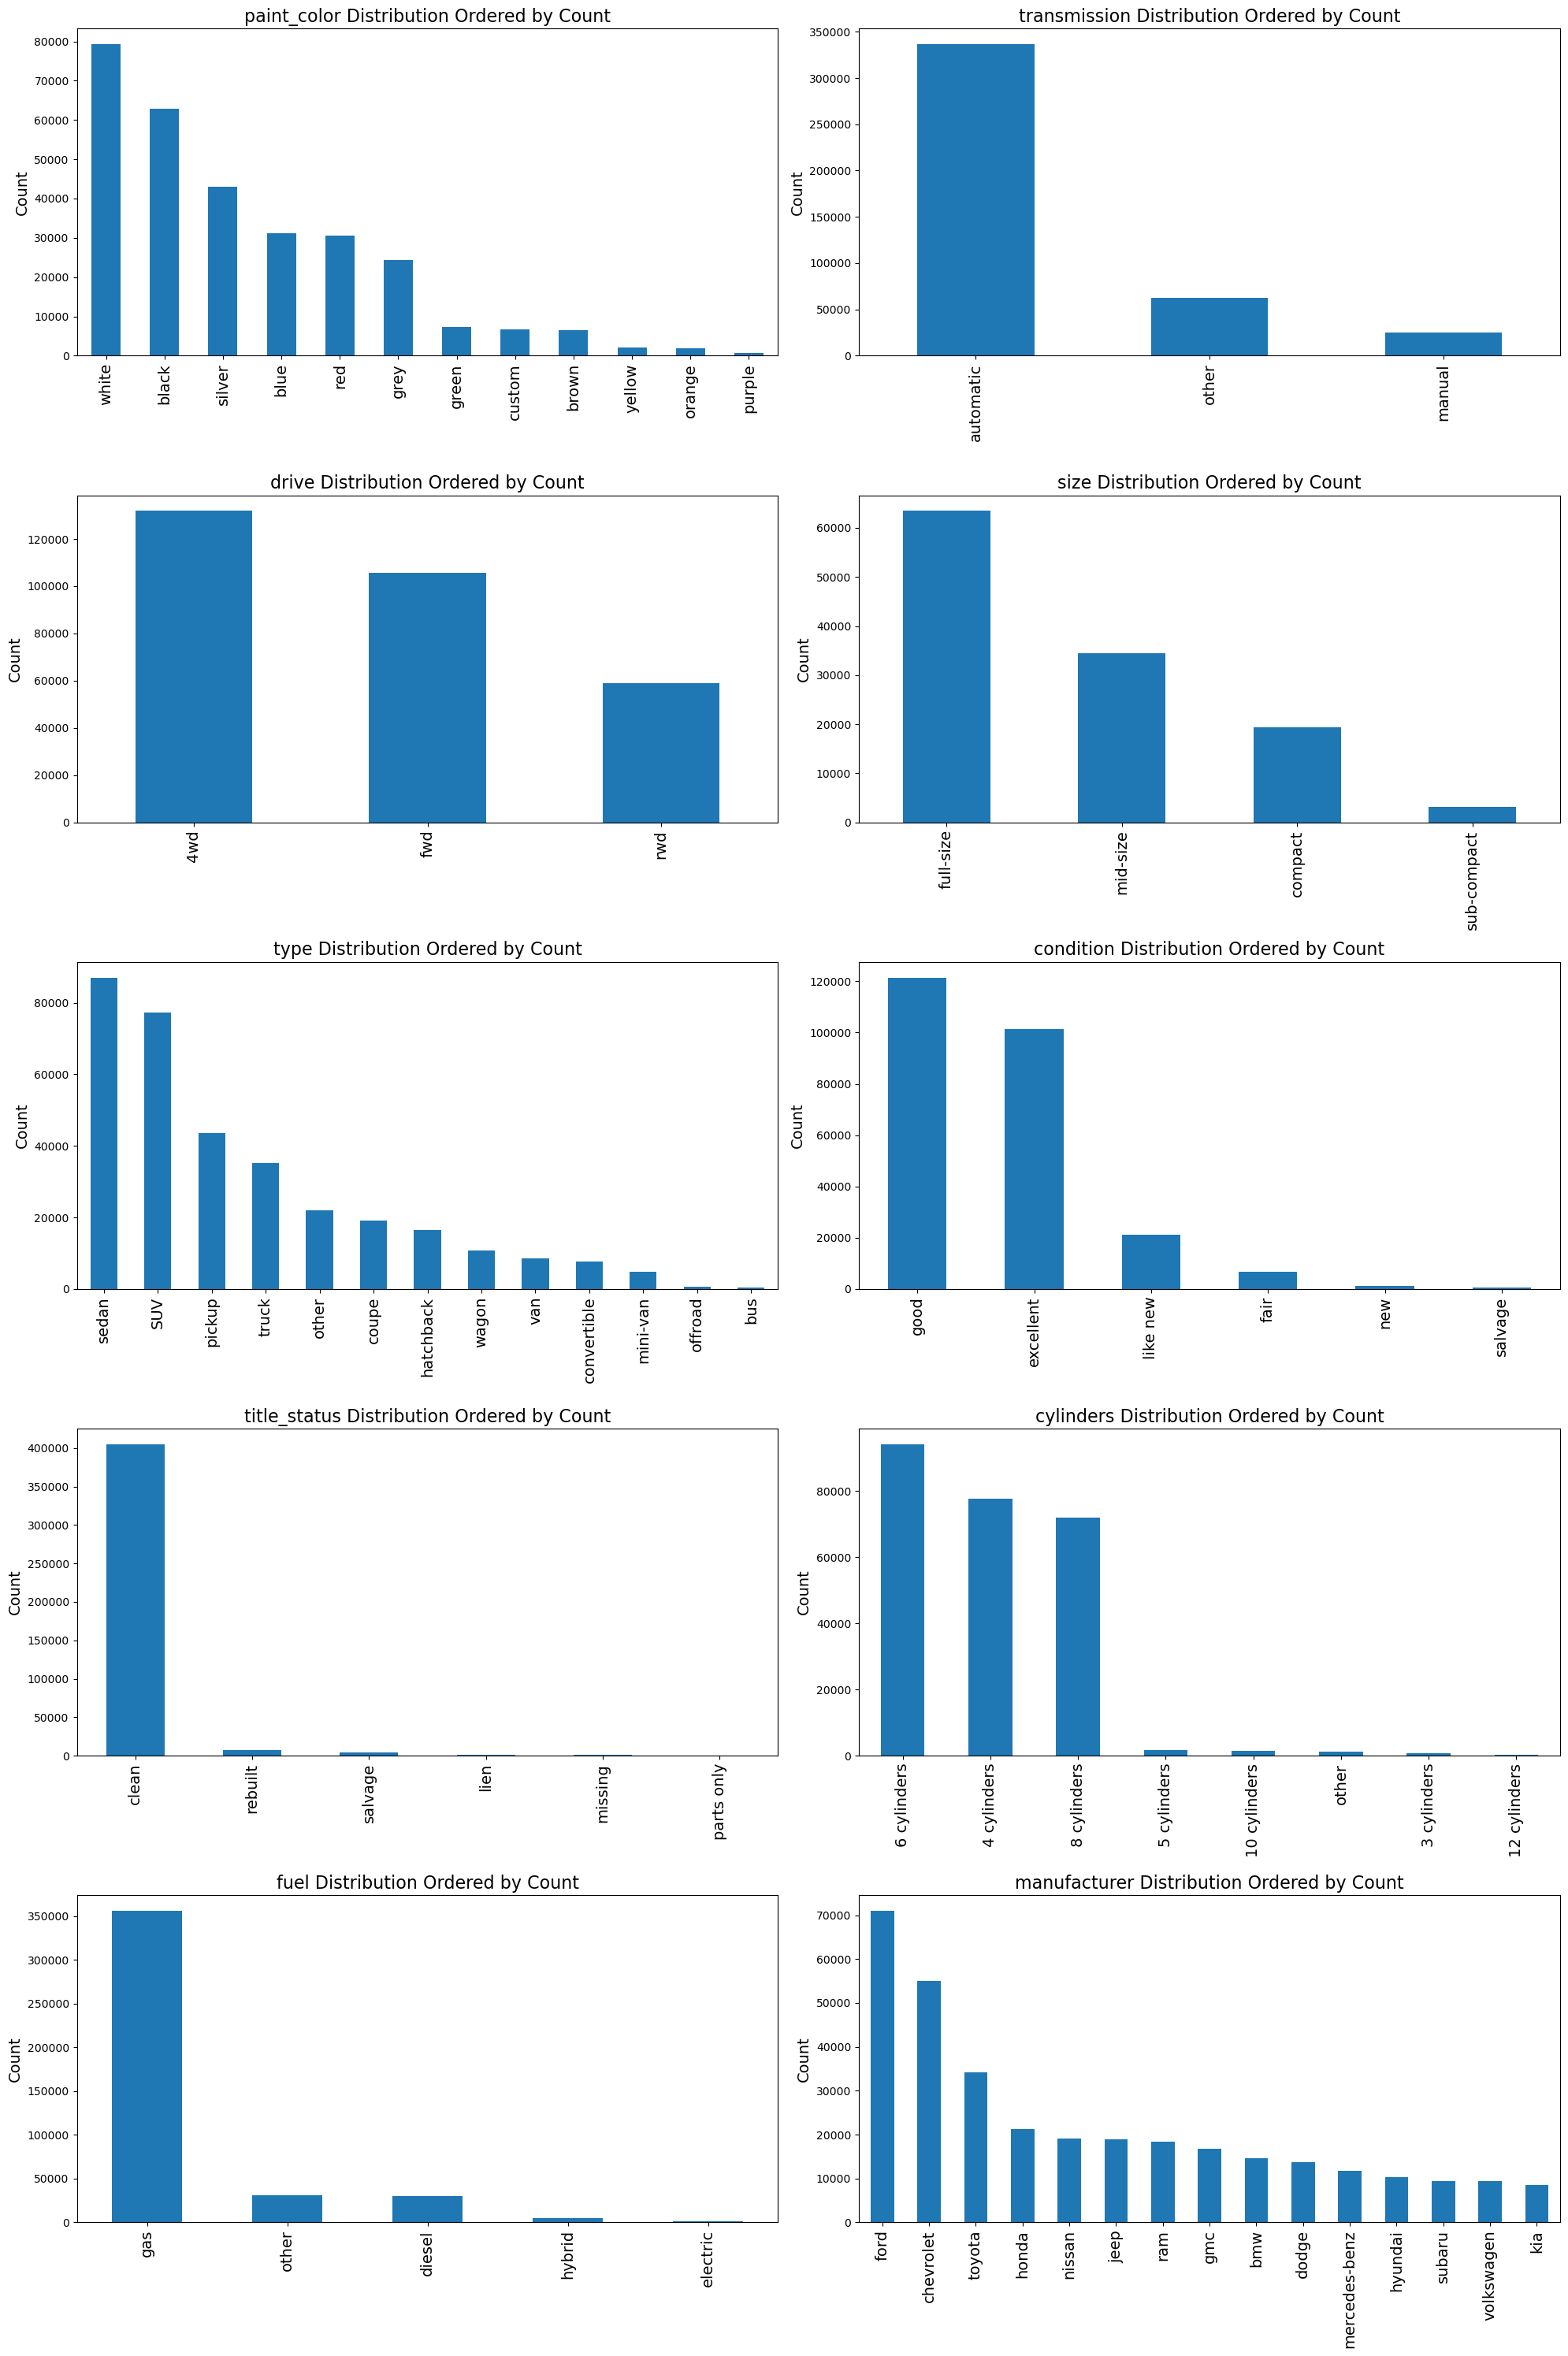


DONE


In [55]:
################################################################################################################################
# Produce Feature Plots
################################################################################################################################

plt.figure(figsize=(20, 30))

features_list = { 'manufacturer', 'cylinders', 'type', 'fuel', 'title_status', 'condition', 'drive', \
             'paint_color' , 'size' , 'transmission' }

n = 1
for feature in features_list: 
    plt.subplot(5, 2, n)
    df[feature].value_counts().head(15).plot(kind='bar')
    plt.title(f"{feature} Distribution Ordered by Count", fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=14)
    n = n + 1

plt.tight_layout()
plt.show()

print()
print('DONE')

In [34]:
################################################################################################################################
#Determine the count of duplicate rows
################################################################################################################################

#-------------------------------------------------------------------------------------------------------------------------------
# Determine the number of duplicate rows
#-------------------------------------------------------------------------------------------------------------------------------
num_duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")

#-------------------------------------------------------------------------------------------------------------------------------
# Determine the number of duplicate IDs
#-------------------------------------------------------------------------------------------------------------------------------
num_duplicate_vins = df.dropna(subset=['id']).duplicated('id').sum()
print(f"Number of duplicate IDs (excluding NaN): {num_duplicate_vins}")

#-------------------------------------------------------------------------------------------------------------------------------
# Determine the count of duolicate VINs
#-------------------------------------------------------------------------------------------------------------------------------
num_duplicate_vins = df.dropna(subset=['VIN']).duplicated('VIN').sum()
print(f"Number of duplicate VINs (excluding NaN): {num_duplicate_vins}")

#--------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS AFTER RUNNING
#--------------------------------------------------------------------------------------------------------------------------------
#There are an aweful lot of duplicate VINs in the dataset. VINs are unique values, so there shouldn't be multiple occurrences of
#VINs in the dataset unless each entry represents a different sale of the same vehicle. Need to check further.

Number of duplicate rows: 0
Number of duplicate IDs (excluding NaN): 0
Number of duplicate VINs (excluding NaN): 147592


In [35]:
df_nonan = df.dropna(subset=['VIN'])
sorted_df = df_nonan.sort_values(by='VIN')
sorted_df.head(10)

#--------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS AFTER RUNNING
#--------------------------------------------------------------------------------------------------------------------------------
#There are an aweful lot of duplicate VINs in the dataset

id          region     price    year manufacturer  \
178021  7315671263           maine         0  2017.0       toyota   
179671  7310739791           maine         0  2017.0       toyota   
288400  7302113550  akron / canton  12345678  2019.0    chevrolet   
273200  7313571610     long island      2500  1957.0          NaN   
180018  7309696818           maine         0  2018.0       toyota   
303644  7302117601      youngstown  12345678  2019.0    chevrolet   
179184  7312086573           maine         0  2017.0       toyota   
180617  7307079093           maine         0  2018.0       toyota   
44754   7311922008    palm springs         1  1900.0          NaN   
32544   7313782174   inland empire         1  1900.0          NaN   

                     model condition    cylinders   fuel  odometer  \
178021  highlander limited       NaN          NaN    gas   29345.0   
179671  highlander limited       NaN          NaN    gas   29345.0   
288400                 NaN      good  8 cylinders    gas  100000.0   
273200        willys wagon      fair  4 cylinders    gas   10000.0   
180018  highlander limited       NaN          NaN    gas   29345.0   
303644                 NaN      good  8 cylinders    gas  100000.0   
179184  highlander limited       NaN          NaN    gas   29345.0   
180617  highlander limited       NaN          NaN    gas   29345.0   
44754                  All      good        other  other    1000.0   
32544                  All      fair        other  other  100000.0   

       title_status transmission VIN drive       size   type paint_color state  
178021        clean    automatic   0   NaN        NaN    NaN         NaN    me  
179671        clean    automatic   0   NaN        NaN    NaN         NaN    me  
288400        clean    automatic   0   4wd  full-size  truck       black    oh  
273200      missing       manual   0   rwd  full-size    SUV      custom    ny  
180018        clean    automatic   0   NaN        NaN    NaN         NaN    me  
303644        clean    automatic   0   4wd  full-size  truck       black    oh  
179184        clean    automatic   0   NaN        NaN    NaN         NaN    me  
180617        clean    automatic   0   NaN        NaN    NaN         NaN    me  
44754         clean        other   0   NaN        NaN  other      custom    ca  
32544         clean        other   0   NaN        NaN  other      custom    ca

In [36]:
################################################################################################################################
# Code to count the number of duplicate VIN entries with different prices
################################################################################################################################

duplicates_with_different_prices = df[df.duplicated('VIN', keep=False)]
grouped = duplicates_with_different_prices.groupby('VIN')
count = 0

for name, group in grouped:
    if group['price'].nunique() > 1:
        count += 1
count

#--------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS AFTER RUNNING
#--------------------------------------------------------------------------------------------------------------------------------
# These are a subset of the duplicate VINs that should be completely removed from the dataset as opposed to removing all but the
# first entry. Conflicting price values for duplicate VINs implies that the pricing is not correct for these entries.

3590

In [37]:
################################################################################################################################
#Determine the count of negative values for each numeric column
################################################################################################################################
num_cols = df.select_dtypes(include=['int64', 'float64'])
negative_counts = (num_cols < 0).sum()
print("Number of negative values in each numeric column:")
print(negative_counts)

#--------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS AFTER RUNNING
#--------------------------------------------------------------------------------------------------------------------------------
# No issues found

Number of negative values in each numeric column:
id          0
price       0
year        0
odometer    0
dtype: int64


In [38]:
################################################################################################################################
# Determine the count of zero values for each numeric column
#############################################################################################################################
num_cols = df.select_dtypes(include=['int64', 'float64'])
negative_counts = (num_cols == 0).sum()
print("Number of negative values in each numeric column:")
print(negative_counts)

#--------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS AFTER RUNNING
#--------------------------------------------------------------------------------------------------------------------------------
# price = odometer = 0 implies missing information as these values should not be zero. Vehicles can't be sold for $0. Also, even
# new vehicles have some miles on the odometer.

Number of negative values in each numeric column:
id              0
price       32895
year            0
odometer     1965
dtype: int64


In [39]:
################################################################################################################################
# Check for the percentage of missing values designated as 'NaN'
################################################################################################################################

nan_percent = df.isnull().sum() / df.shape[0]
print(nan_percent)

#--------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS AFTER RUNNING:
#--------------------------------------------------------------------------------------------------------------------------------
#Many of the high percentage columns have already been identified above for elimination from the dataset. The remaining rows
#with 'NaN' values will be removed.

id              0.000000
region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
state           0.000000
dtype: float64


In [40]:
################################################################################################################################
# Check for mis-classifications
################################################################################################################################

#Check for mis-classification of Cylinder Counts for electric vehicles, which do not have cylinders

tmp_df = df[df['fuel'] == 'electric']
print(f"Number of 'electric' entries in the 'fuel' column: {tmp_df.shape[0]}")
print(f"Broken out by 'cyliners' categories:")
print(tmp_df['cylinders'].value_counts(dropna=False))

#Check for mis-classifications of hybrid vehicles in the fuel column for vehicles identified as hybrids in the model column

print()
tmp_df = df[df['model'].str.contains('hybrid', case=False, na=False)]
print(f"Number of 'hybrid' entries in the 'model' column: {tmp_df.shape[0]}")
print(f"Broken out by 'fuel' categories:")
print(tmp_df['fuel'].value_counts())

print()
tmp_df = df[df['manufacturer'].str.contains('harley-davidson', case=False, na=False)]
print(f"Number of 'harley-davidson' entries in the 'manufacturer' column: {tmp_df.shape[0]}")
print(f"Broken out by 'type' categories:")
print(tmp_df['type'].value_counts())

#--------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS AFTER RUNNING:
#--------------------------------------------------------------------------------------------------------------------------------
#Almost all electric vehicles have 'NaN' or 'other' designated for their cylinder counts. If we were to remove all these entries,
#it would skew the analysis results. Therefore, all Electric vehicles will be designated into a new cylinder count category to be
#called 'no gas'.

#There are a large number of vehicles identified as 'hybrids' in the 'model' column that do not have 'hybrid' identified as the
#fuel type.

#Harley only manufactures motorcycles but occassionally partnered with other manufacturers to brand a very limited number of
#other types of vehicles. It isn't clear if these other types of vehicles are mis-classifications or correct. However, We'll
#want to eliminate these from the dataset as their pricing wouldn't have represented broader market trends.

Number of 'electric' entries in the 'fuel' column: 1698
Broken out by 'cyliners' categories:
NaN            1386
other           193
4 cylinders     100
6 cylinders      11
8 cylinders       7
3 cylinders       1
Name: cylinders, dtype: int64

Number of 'hybrid' entries in the 'model' column: 2865
Broken out by 'fuel' categories:
hybrid      1761
gas          830
other        193
electric      32
diesel        28
Name: fuel, dtype: int64

Number of 'harley-davidson' entries in the 'manufacturer' column: 153
Broken out by 'type' categories:
other      47
truck      25
pickup     20
sedan       2
SUV         1
van         1
offroad     1
Name: type, dtype: int64


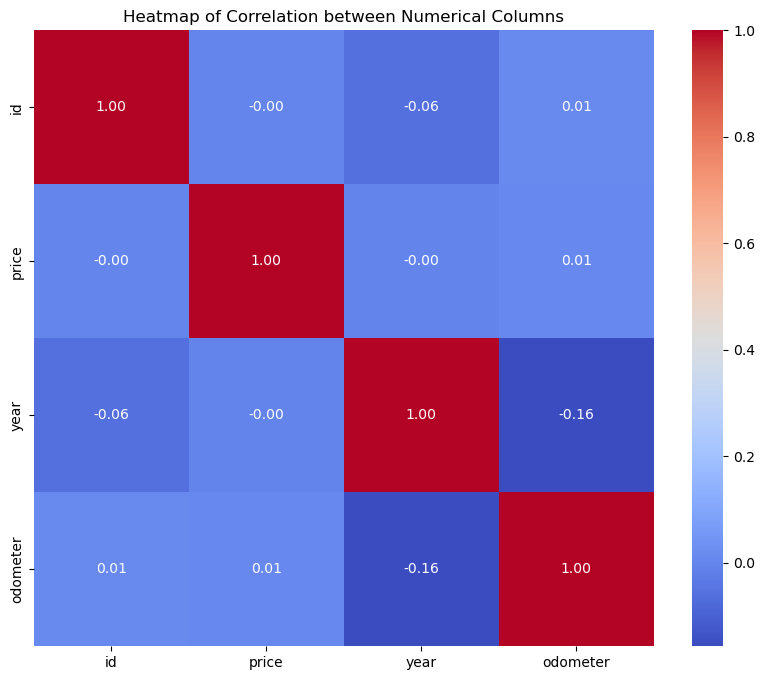

In [41]:
################################################################################################################################
# Check for correlations between numeric columns
################################################################################################################################

num_cols = df.select_dtypes(exclude=['object']).columns
corr_matrix = df[num_cols].corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap of Correlation between Numerical Columns")
plt.show()

#--------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS AFTER RUNNING:
#--------------------------------------------------------------------------------------------------------------------------------
# The correlations between numeric columns are all weak. This does not suggest any opportunity for model simplifcation based on 
# the numeric columns. In other words, the numeric variables effectively contribute to the target variable independently.


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
# This phase would involve cleaning and preparing the data for analysis, such as handling missing values, outliers, 
# and transforming variables if necessary.

SPARSE CLASSES ELIMINATED:
   manufacturer        : ['harley-davidson', 'ferrari', 'datsun', 'aston-martin', 'land rover']
   condition           : ['salvage']
   cylinders           : ['12 cylinders']
   title_status        : ['missing', 'parts only']
   type                : ['offroad', 'bus']

Dataset Size (Uncleaned): 426880
Dataset Size (Cleaned  ): 111376

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111376 entries, 27 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         111376 non-null  int64  
 1   manufacturer  111376 non-null  object 
 2   condition     111376 non-null  object 
 3   cylinders     111376 non-null  object 
 4   fuel          111376 non-null  object 
 5   odometer      111376 non-null  float64
 6   title_status  111376 non-null  object 
 7   transmission  111376 non-null  object 
 8   drive         111376 non-null  object 
 9   size          111376 non-null  obj

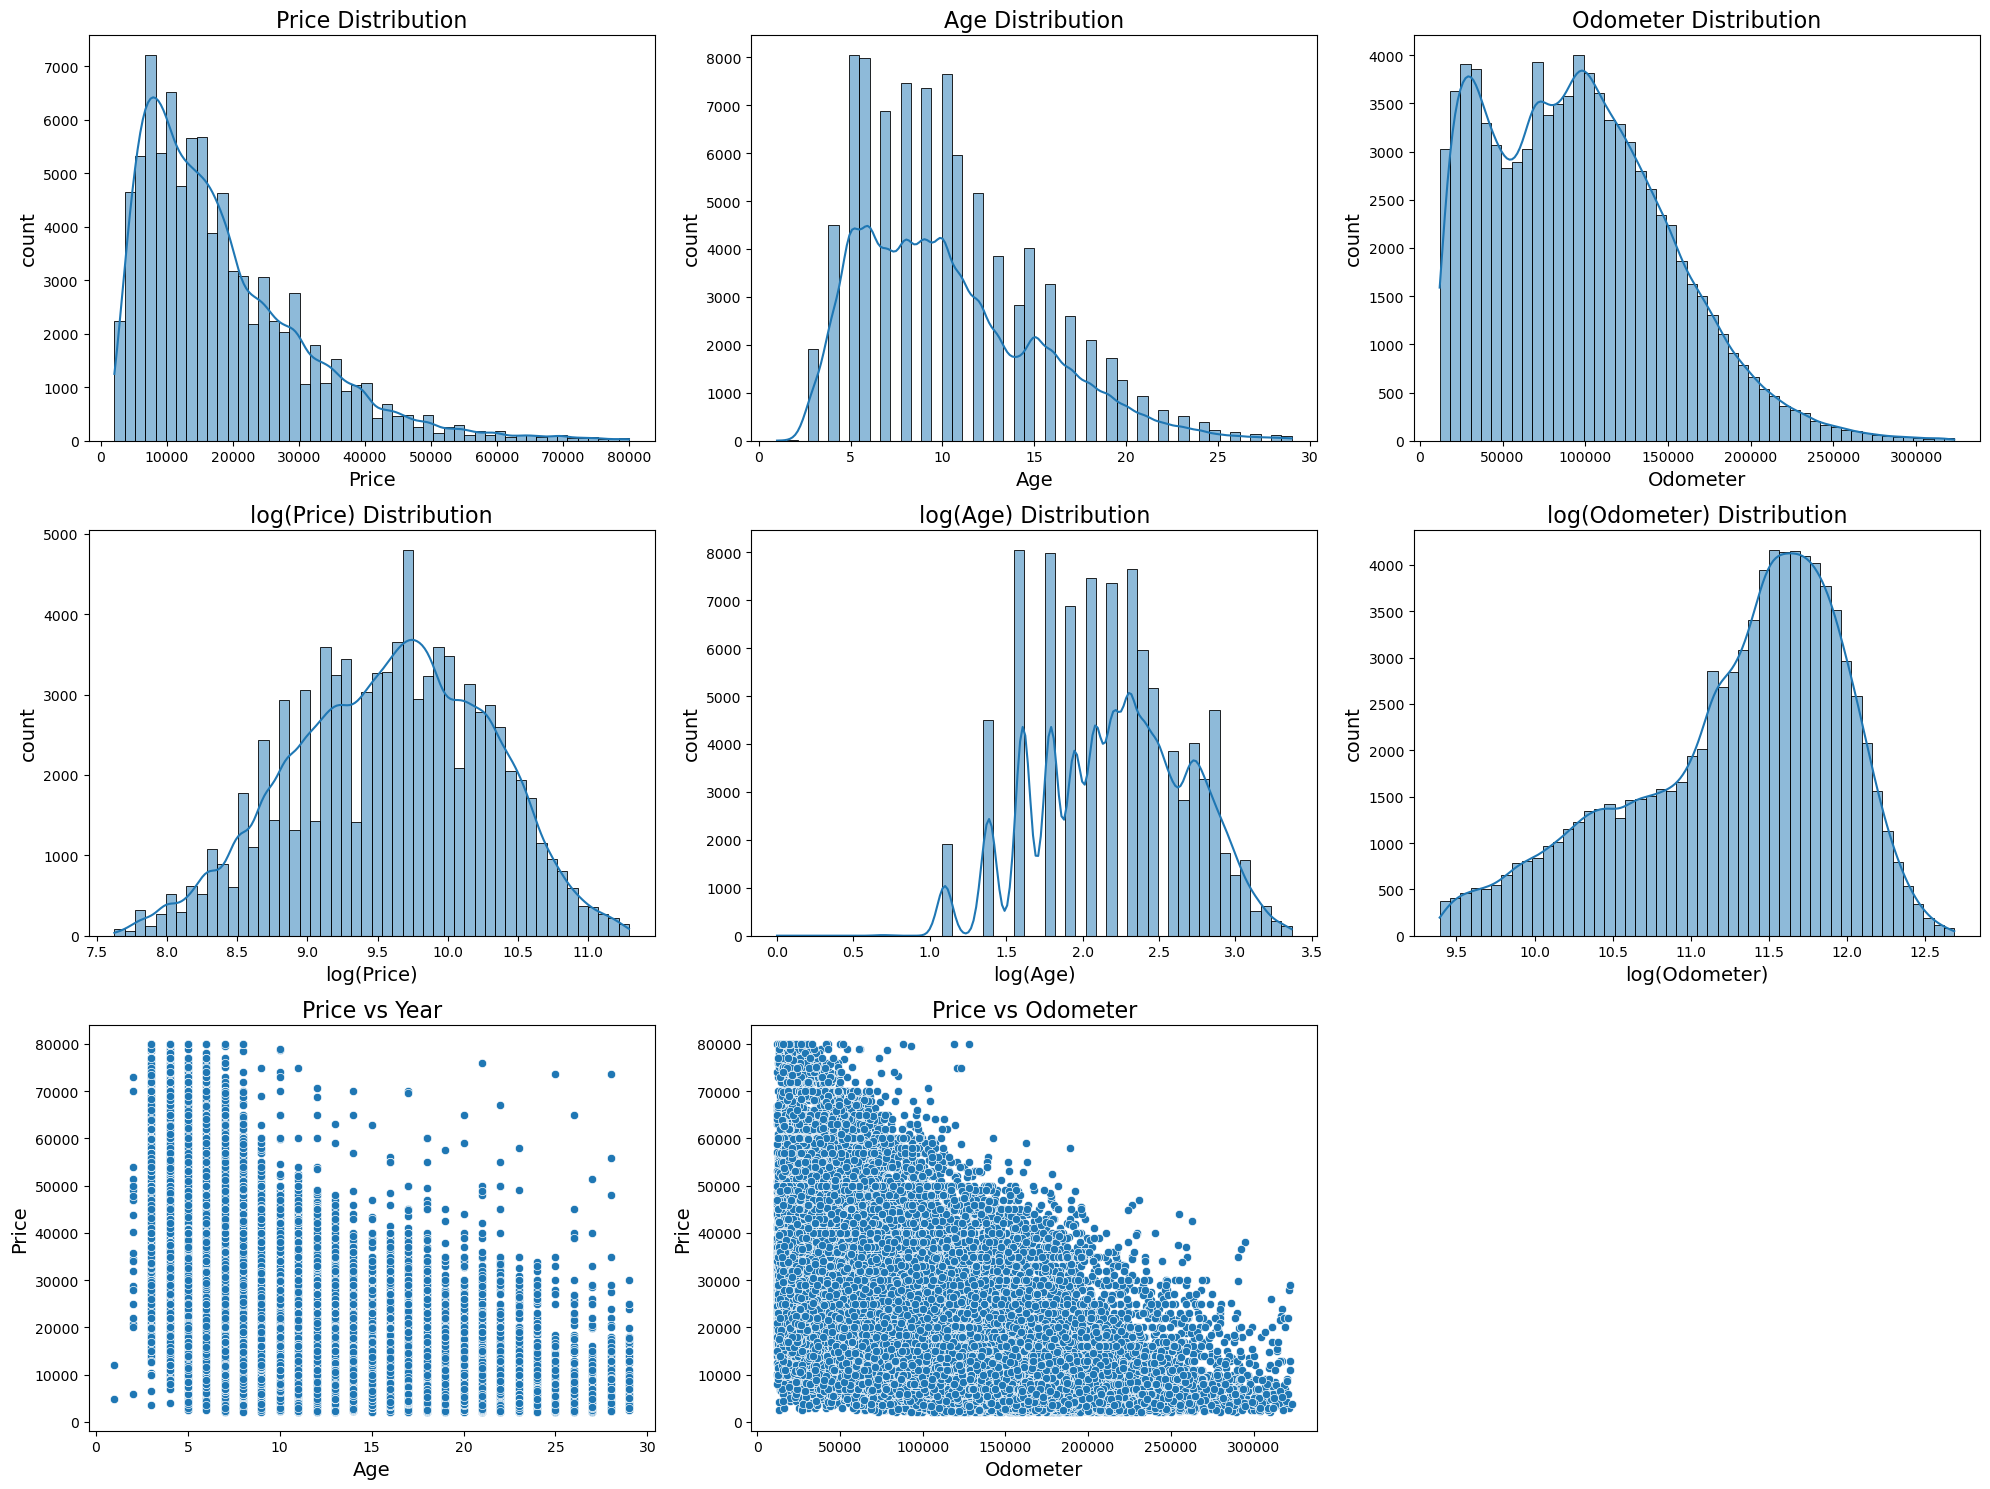


DONE


In [42]:
warnings.filterwarnings('ignore')

df_cleaned = df

################################################################################################################################
# HANDLE MISSING / OUTLIER DATA
################################################################################################################################

#-------------------------------------------------------------------------------------------------------------------------------
# Drop rows where 'price', 'year', 'manufacturer', or 'VIN' is missing, as these are crucial for the analysis
#-------------------------------------------------------------------------------------------------------------------------------

df_cleaned = df_cleaned.dropna(subset=['price', 'year', 'manufacturer', 'VIN'])

#-------------------------------------------------------------------------------------------------------------------------------
# For numerical data, replace missing values with the median value
#-------------------------------------------------------------------------------------------------------------------------------

df_cleaned['odometer'] = df_cleaned['odometer'].fillna(df_cleaned['odometer'].median())

#-------------------------------------------------------------------------------------------------------------------------------
# For categorical data, replace missing values with 'unknown'.
#-------------------------------------------------------------------------------------------------------------------------------

cat_cols = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna('unknown')

################################################################################################################################
# HANDLE DUPLICATE DATA: 
################################################################################################################################

#-------------------------------------------------------------------------------------------------------------------------------
# Drop rows with duplicate VINs. If rows with the same VIN have different prices, remove all occurrences of that VIN. If they
# all have the same price, remove all but the first occurrence.
#-------------------------------------------------------------------------------------------------------------------------------

df_cleaned = df_cleaned.groupby('VIN').filter(lambda x: x['price'].nunique() == 1)
df_cleaned = df_cleaned.drop_duplicates(subset='VIN')

################################################################################################################################
# HANDLE INCONSISTENT DATA BETWEEN COLUMNS:
################################################################################################################################

#-------------------------------------------------------------------------------------------------------------------------------
# Reclassify all hybrids identified as hybrids in the 'model' column as having fuel = 'hybrid'
#-------------------------------------------------------------------------------------------------------------------------------

df_cleaned['fuel'     ] = df_cleaned.apply(lambda row: 'hybrid' if isinstance(row['model'], str) and 'hybrid' in \
                             row['model'].lower() else row['fuel'], axis=1)

#-------------------------------------------------------------------------------------------------------------------------------
# Cylinders means something different for hybrids as opposed to gas powered vehicles. For this analysis we're going to ignore
# the number of cylinders for non-gas powered vehicles, so all non-gas powered vehicles will have cylinders set to 'non_gas'
#-------------------------------------------------------------------------------------------------------------------------------

df_cleaned['cylinders'] = df_cleaned.apply(lambda row: 'non_gas' if row['fuel'] in \
                             ['electric', 'hybrid'] else row['cylinders'], axis=1)

################################################################################################################################
# HANDLE UNUSED COLUMNS: Cols where data is not required ('id', 'VIN', 'region', 'state') or too cluttered ('model') for use.
################################################################################################################################

df_cleaned = df_cleaned.drop(['id', 'VIN', 'region', 'state', 'model'], axis=1)

################################################################################################################################
# HANDLE SPARSE COLUMN VALUES:
################################################################################################################################

# Remove rows where any categorical column's class is too sparse (count < threshold)

threshold = 150

# Function to filter out rows with class counts below the threshold in a given column

print("SPARSE CLASSES ELIMINATED:")
def filter_low_count_classes(df, col, threshold):
    value_counts = df[col].value_counts()
    low_count_values = value_counts[value_counts < threshold].index

    # Printing out the eliminated classes
    if len(low_count_values) > 0:
        print(f"   {col:20}: {list(low_count_values)}")
        
    df = df[~df[col].isin(low_count_values)]
    return df

# Applying the function to each categorical column
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_cleaned = filter_low_count_classes(df_cleaned, col, threshold)

################################################################################################################################
# ADD DATA COLUMNS:
################################################################################################################################

#-------------------------------------------------------------------------------------------------------------------------------
# Add a column that identifies the nationality of each manufacturing brand
#-------------------------------------------------------------------------------------------------------------------------------

def get_nationality(manufacturer):
    nationalities = {
        'gmc'         : 'American', 'chevrolet'      : 'American'    , 'toyota'       : 'Japanese', 
        'ford'        : 'American', 'jeep'           : 'American'    , 'nissan'       : 'Japanese', 
        'ram'         : 'American', 'mazda'          : 'Japanese'    , 'cadillac'     : 'American', 
        'honda'       : 'Japanese', 'dodge'          : 'American'    , 'lexus'        : 'Japanese', 
        'jaguar'      : 'British' , 'buick'          : 'American'    , 'chrysler'     : 'American', 
        'volvo'       : 'Swedish' , 'audi'           : 'German'      , 'infiniti'     : 'Japanese', 
        'lincoln'     : 'American', 'alfa-romeo'     : 'Italian'     , 'subaru'       : 'Japanese', 
        'acura'       : 'Japanese', 'hyundai'        : 'South Korean', 'mercedes-benz': 'German'  , 
        'bmw'         : 'German'  , 'mitsubishi'     : 'Japanese'    , 'volkswagen'   : 'German'  , 
        'porsche'     : 'German'  , 'kia'            : 'South Korean', 'rover'        : 'British' , 
        'ferrari'     : 'Italian' , 'mini'           : 'British'     , 'pontiac'      : 'American', 
        'fiat'        : 'Italian' , 'tesla'          : 'American'    , 'saturn'       : 'American', 
        'mercury'     : 'American', 'harley-davidson': 'American'    , 'datsun'       : 'Japanese', 
        'aston-martin': 'British' , 'land rover'     : 'British'     , 'morgan'       : 'British'
    }
    return nationalities.get(manufacturer.lower(), 'Unknown')

df_cleaned['nationality'] = df_cleaned['manufacturer'].apply(get_nationality)
    
#-------------------------------------------------------------------------------------------------------------------------------
# Change 'years' to 'age' and then drop the 'years' column
#-------------------------------------------------------------------------------------------------------------------------------

df_cleaned['age'] = 2023 - df_cleaned['year']
df_cleaned = df_cleaned.drop(['year'], axis=1)

################################################################################################################################
# VERIFY CLEANED DATA
################################################################################################################################

print()
print('Dataset Size (Uncleaned): ' + str(df.shape[0]))
print('Dataset Size (Cleaned  ): ' + str(df_cleaned.shape[0]))
print()

df_cleaned.info()
print()

################################################################################################################################
# ADDRESS OUTLIERS:
################################################################################################################################

df_cleaned = df_cleaned[(df_cleaned['age'     ] >     0) & (df_cleaned['age'     ] <      30)]
df_cleaned = df_cleaned[(df_cleaned['odometer'] > 12000) & (df_cleaned['odometer'] < 0.325e6)]

#-------------------------------------------------------------------------------------------------------------------------------
# Drop rows with price extreme price data since they represent outliers that can skew the anlytical results
#-------------------------------------------------------------------------------------------------------------------------------

df_cleaned = df_cleaned[(df_cleaned['price'] > 2000) & (df_cleaned['price'] < 80000)]

################################################################################################################################
# Perform Final Checks
################################################################################################################################

# Setting up the visualization
plt.figure(figsize=(20, 15))

#-------------------------------------------------------------------------------------------------------------------------------
# Generate Exploratory Data Analysis (EDA) Plots
#-------------------------------------------------------------------------------------------------------------------------------
# Price Distribution
plt.subplot(3, 3, 1)
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('count', fontsize=14)

# Year Distribution
plt.subplot(3, 3, 2)
sns.histplot(df_cleaned['age'], bins=50, kde=True)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('count', fontsize=14)

# Odometer Distribution
plt.subplot(3, 3, 3)
sns.histplot(df_cleaned['odometer'], bins=50, kde=True)
plt.title('Odometer Distribution', fontsize=16)
plt.xlabel('Odometer', fontsize=14)
plt.ylabel('count', fontsize=14)

# Price Distribution
plt.subplot(3, 3, 4)
sns.histplot(np.log(df_cleaned['price']), bins=50, kde=True)
plt.title('log(Price) Distribution', fontsize=16)
plt.xlabel('log(Price)', fontsize=14)
plt.ylabel('count', fontsize=14)

# Year Distribution
plt.subplot(3, 3, 5)
sns.histplot(np.log(df_cleaned['age']), bins=50, kde=True)
plt.title('log(Age) Distribution', fontsize=16)
plt.xlabel('log(Age)', fontsize=14)
plt.ylabel('count', fontsize=14)

# Odometer Distribution
plt.subplot(3, 3, 6)
sns.histplot(np.log(df_cleaned['odometer']), bins=50, kde=True)
plt.title('log(Odometer) Distribution', fontsize=16)
plt.xlabel('log(Odometer)', fontsize=14)
plt.ylabel('count', fontsize=14)

# Price vs Year
plt.subplot(3, 3, 7)
sns.scatterplot(data=df_cleaned, x='age', y='price')
plt.title('Price vs Year', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Price vs Odometer
plt.subplot(3, 3, 8)
sns.scatterplot(data=df_cleaned, x='odometer', y='price')
plt.title('Price vs Odometer', fontsize=16)
plt.xlabel('Odometer', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.tight_layout()
plt.show()

print()
print('DONE')

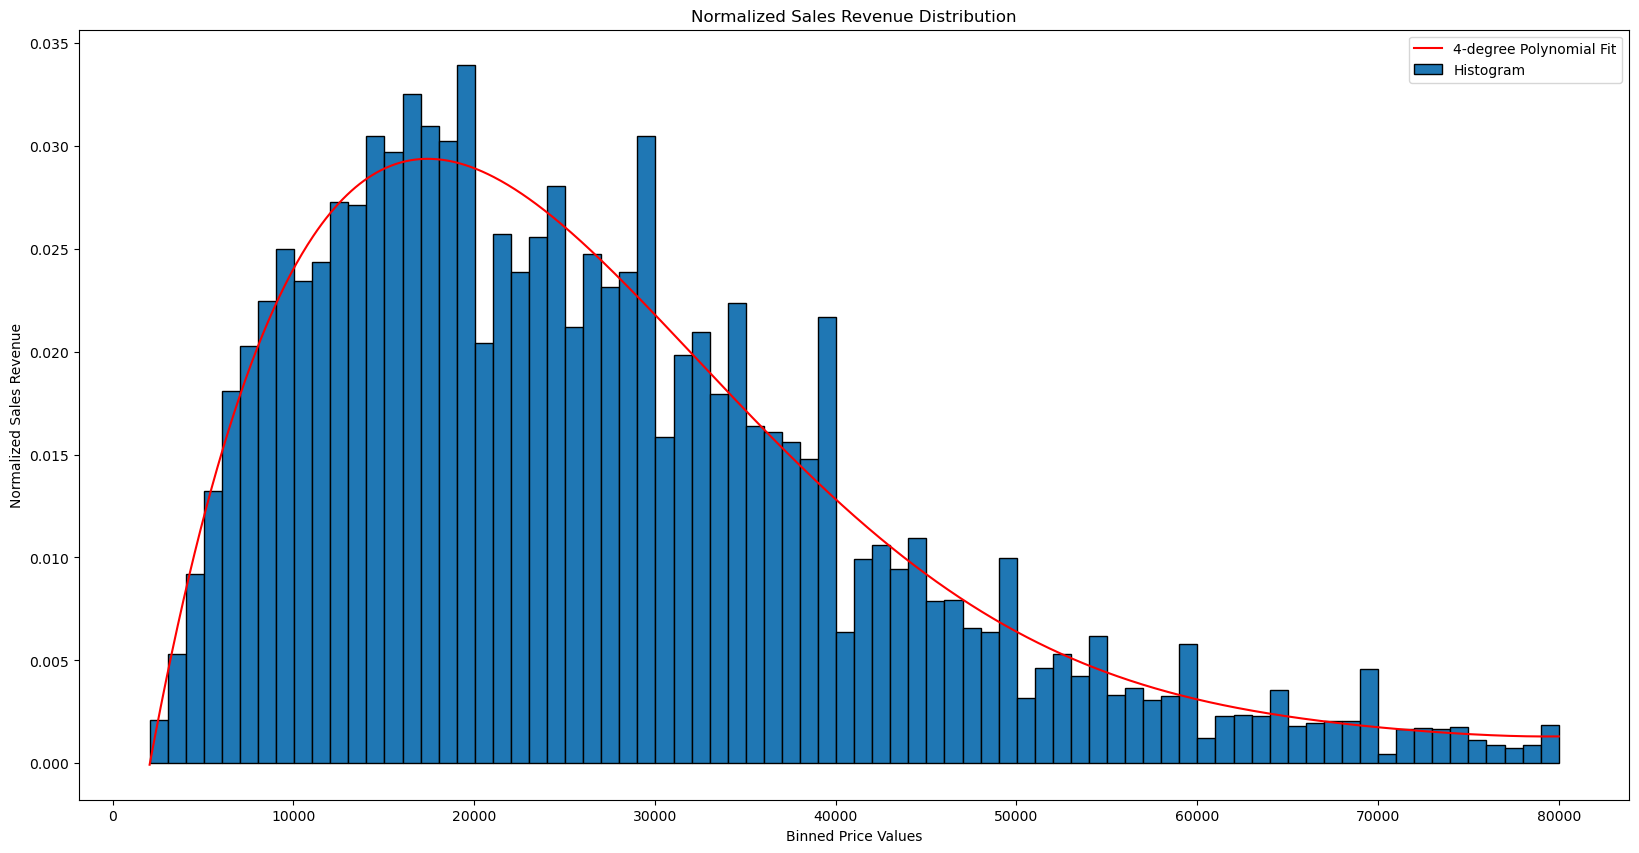

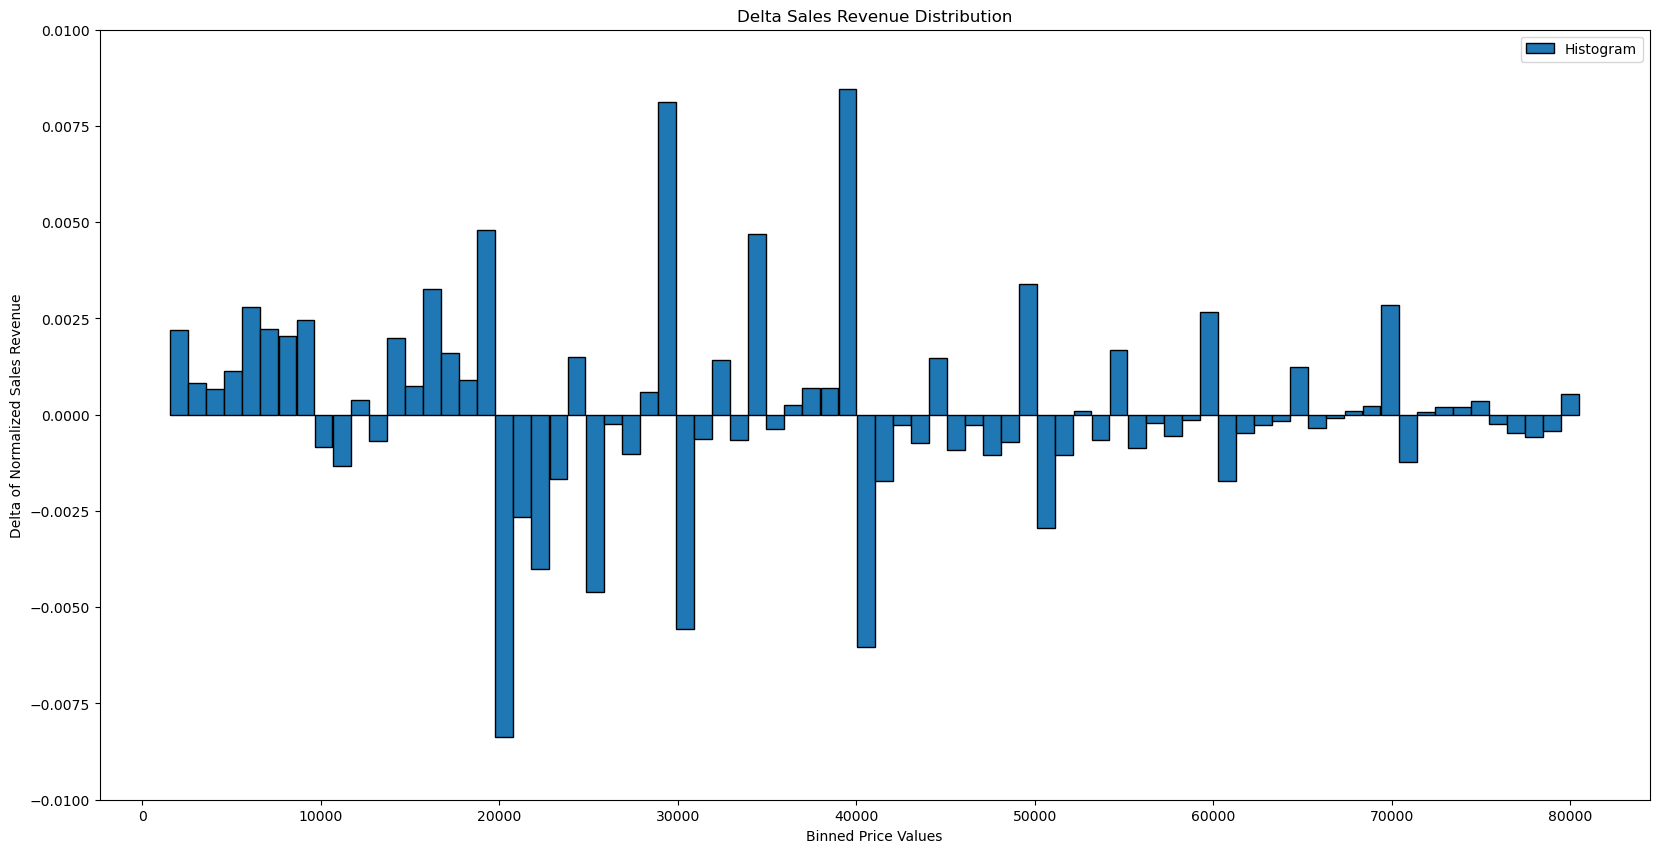

Vehicle Price at Peak Sales Revenue: $17421.32


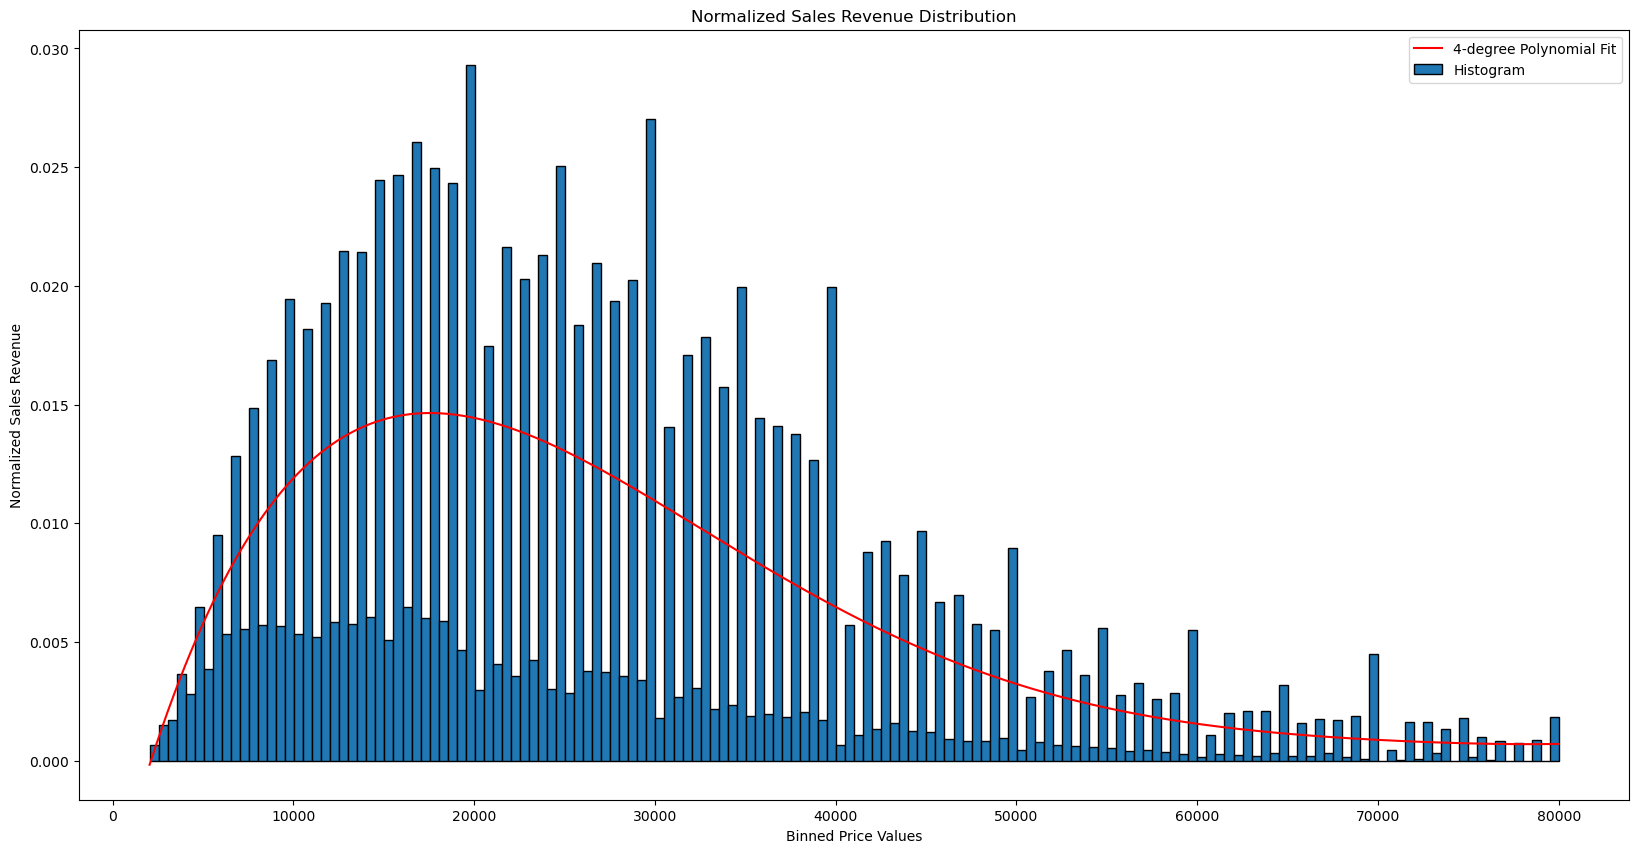

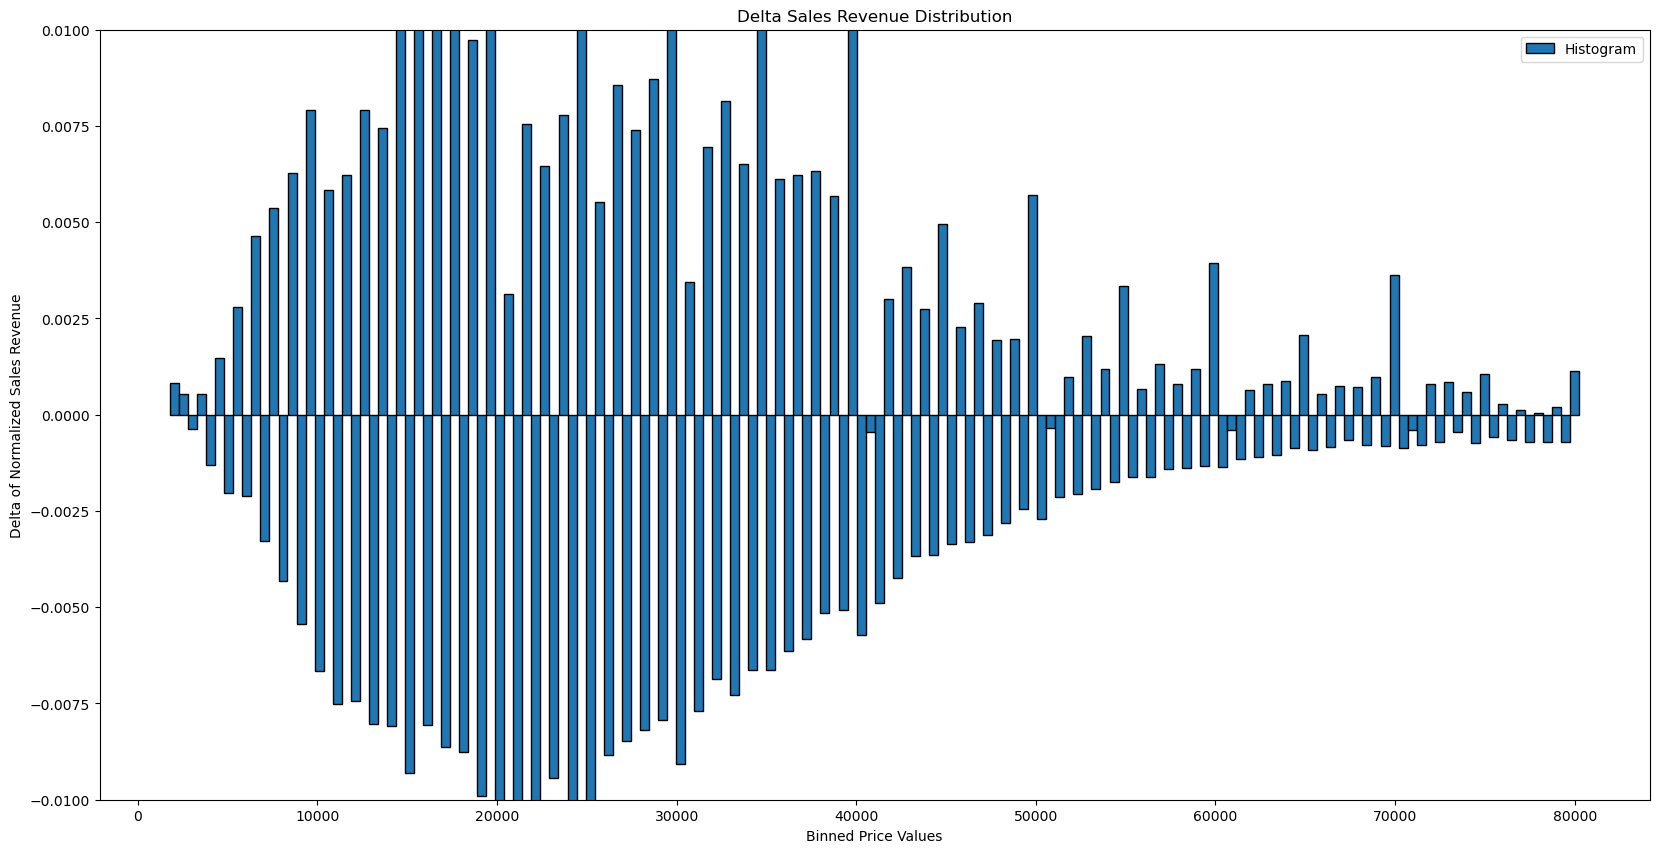

Vehicle Price at Peak Sales Revenue: $17577.38


In [46]:
################################################################################################################################
# Determine the Vehicle Value for which the most revenue is generated for vehicles in the cleaned dataset
################################################################################################################################

def generate_histograms(x):
    #---------------------------------------------------------------------------------------------------------------------------
    # Histogram with 78 bins, each containing counts of similar Prices within a range of $1000
    #---------------------------------------------------------------------------------------------------------------------------

    data = df_cleaned['price']
    counts, bin_edges = np.histogram(data, bins=x)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    vals = bin_centers * counts
    norm_vals = vals / np.sum(vals)

    # Fit a 4-degree polynomial to the data
    p = np.polyfit(bin_centers, norm_vals, 5)
    poly = np.poly1d(p)

    # Generate x values for the polynomial curve
    x_poly = np.linspace(bin_edges.min(), bin_edges.max(), 1000)
    y_poly = poly(x_poly)

    # Plot
    plt.figure(figsize=(20, 10))
    plt.bar(bin_centers, norm_vals, width=np.diff(bin_edges), edgecolor='black', label='Histogram')
    plt.plot(x_poly, y_poly, color='red', label='4-degree Polynomial Fit')
    plt.title('Normalized Sales Revenue Distribution')
    plt.xlabel('Binned Price Values')
    plt.ylabel('Normalized Sales Revenue')
    plt.legend()
    plt.show()

    x_peaks = np.linspace(bin_edges.min(), bin_edges.max(), x)
    y_peaks = (norm_vals - poly(x_peaks))
    
    # Plot
    plt.figure(figsize=(20, 10))
    plt.bar(x_peaks, y_peaks, width=np.diff(bin_edges), edgecolor='black', label='Histogram')
    plt.title('Delta Sales Revenue Distribution')
    plt.xlabel('Binned Price Values')
    plt.ylabel('Delta of Normalized Sales Revenue')
    plt.ylim(-.01, .01)
    plt.legend()
    plt.show()

    peak_index = np.argmax(y_poly)
    peak_value = y_poly[peak_index]
    peak_x = x_poly[peak_index]
    
    print('Vehicle Price at Peak Sales Revenue: $' + str(round(peak_x, 2)))

generate_histograms(78 )
generate_histograms(156)

#--------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS AFTER RUNNING:
#--------------------------------------------------------------------------------------------------------------------------------
# The polynomial line fits the distribution well and the peak of the normalized curve occurs at $17,577.38. To maximize profita-
# bility, dealers should prioritize the sale of vehicles above this limit. Because of the distribution's long right tail,
# profitability improves with higher valued vehicles although they account for much less of overall sales revenue because of
# their lack of availability in the market.
#
# Also, significant revenue spikes above the best-fit polynomial curve (red line) occur at every $5K increment of vehicle value.
# Each spike is followed by a trough in the ensuing bin of the histogram. When 78 bins are used, each bin represents a range of
# $1K in vehicle value. Therefore, the pattern indicates a general practice of rounded down vehicle sales prices to the nearest
# $5K increment of value whenever a vehicle's actual value is within ~$1K of the $5K increment. If we change the number of bins
# in the histogram to 156, where each bin represents a range of $500, we see the same effect where vehicle values are also
# rounded to the nearest $1K increment of value.
#
# Dealerships would be well advised to determine the underlying causes of these round-downs as they represent lost sales revenue.
# It is likely that buyers prefer rounded sales values, and the rounded values are necessary to close vehicle sales. However, 
# these patterns may represent biases in dealership vehicle pricing. Also, the impact of these round-down effects is much more
# significant for vehicles at the lower end of the $18 - $80K range because the rounded amounts tend to be a greater proportion
# of the overall vehicle value.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
# In this stage, machine learning models are developed to understand the relationship between different variables and vehicle
# prices. I implement four different modeling approaches and evaluate the models using the MSE and R2 metrics on a test set for
# cross validation. The target variable, 'Price', is also tranformed into log(Price) for use with the model fit methods to 
# provide a more normalized target distribution, which the methods require for optimal fits. Normalized targets result in much
# better modeel fits. 
#
# TEST SET MSE: Provides a clear indication of how well the models perform in terms of numerical predictions. A lower test set 
# MSE indicates a better fit of the model to the data. With MSE, larger errors are given more weight. This is particularly use-
# ful in scenarios where we want to avoid large deviations from the actual values.
#
# TEST SET R2: Measures the proportion of the variance in the dependent variable that is predictable from the independent 
# variables in the dataset. It provides an indication of the goodness of fit of a model. The higher the score, the better the 
# fit, and the more the model explains the target values based on the independent variables.
#
# As part of the implementation, I first split the data into training and test sets using a 70%/30% split on the shuffled data. 
# I then implement pipelining techniques to streamline the process of preparing the data for modeling. Categorical columns are
# transformed using onehotencoding. While numerical columns are scaled and augmented with polynomial expansions to allow the
# model to capture non-linear relationships.
#
# GridSearchCV is used to establish hyper-parameters that facilitate the identification of models with better fits to the data.
# Because GridSearchCV implements cross-validation, it automatically splits the training set internally into training and
# development sets for cross validation of the resulting hyper-parameters.

In [47]:
################################################################################################################################
# Split the dataset into features 'X' and target 'y'
################################################################################################################################

df_shuffled = shuffle(df_cleaned)

X = df_shuffled.drop('price', axis=1)
y = np.log(df_shuffled['price'])

################################################################################################################################
# Split the data into training and testing sets
################################################################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print({"Training Set Size": len(X_train), "Test Set Size": len(X_test)})

################################################################################################################################
# Train and Score models
################################################################################################################################

num_cols = X_train.select_dtypes(exclude=['object']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical features including polynomial expansion
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly'  , PolynomialFeatures())
])
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline                          , num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

#-------------------------------------------------------------------------------------------------------------------------------
# Setting up GridSearchCV hyper-parameters for optimization
#-------------------------------------------------------------------------------------------------------------------------------

rng_alpha  = 10 ** np.linspace(-3, 2, 6)   # Consider a range of alpha values
rng_degree = [1, 2, 3]                     # Consider Range of Polynomial Degrees
rng_bias   = [True, False]                 # Consider with and without Polynomial Bias

model_params = {
    'Ridge Regression'        : { 'model' : Ridge(),
                                  'params': { 'regressor__alpha'                     : rng_alpha , 
                                              'preprocessor__num__poly__degree'      : rng_degree,
                                              'preprocessor__num__poly__include_bias': rng_bias }},
    'Lasso Regression'        : { 'model' : Lasso(), 
                                  'params': { 'regressor__alpha'                     : rng_alpha ,
                                              'preprocessor__num__poly__degree'      : rng_degree,
                                              'preprocessor__num__poly__include_bias': rng_bias }},
    'ElasticNet Regression'   : { 'model' : ElasticNet(),
                                  'params': { 'regressor__alpha'                     : rng_alpha ,
                                              'regressor__l1_ratio'                  : np.linspace(0, 1, 5) }},
    'SGD Regression'          : { 'model' : SGDRegressor(),
                                  'params': { 'regressor__alpha'                     : rng_alpha ,
                                              'preprocessor__num__poly__degree'      : rng_degree,
                                              'preprocessor__num__poly__include_bias': rng_bias  ,
                                              'regressor__penalty'                   : ['l2', 'l1', 'elasticnet'] }},
    'Random Forest Regression': { 'model' : RandomForestRegressor(),
                                  'params': { 'regressor__n_estimators'              : [50, 100, 200],             # Number of trees in the forest
                                              'regressor__max_features'              : ['auto', 'sqrt', 'log2'] }} # Number of features to consider at every split
    }

#-------------------------------------------------------------------------------------------------------------------------------
# Evaluate each model with GridSearchCV
#-------------------------------------------------------------------------------------------------------------------------------

model_performance = {}
for model_name, mp in model_params.items():
    
    warnings.filterwarnings('ignore')

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', mp['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, mp['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    model_performance[model_name] = {
        'MSE'              : mean_squared_error(y_test, y_pred),
        'R2'               : r2_score(y_test, y_pred),
        'Best Parameters'  : grid_search.best_params_,
        'Best Alpha'       : grid_search.best_params_.get('regressor__alpha'                     , None),
        'Best Poly Degree' : grid_search.best_params_.get('preprocessor__num__poly__degree'      , None),
        'Best Poly Bias'   : grid_search.best_params_.get('preprocessor__num__poly__include_bias', None),
        'Best Penalty'     : grid_search.best_params_.get('regressor__penalty'                   , None),
        'Best L1 Ratio'    : grid_search.best_params_.get('regressor__l1_ratio'                  , None),
        'Best N Estimators': grid_search.best_params_.get('regressor__n_estimators'              , None),
        'Best Max Features': grid_search.best_params_.get('regressor__max_features'              , None),
        'Coefficients'     : best_model.named_steps['regressor'].coef_                if hasattr(best_model.named_steps['regressor'], 'coef_'               ) \
                        else best_model.named_steps['regressor'].feature_importances_ if hasattr(best_model.named_steps['regressor'], 'feature_importances_') \
                        else None,
        'Preprocessor'     : best_model.named_steps['preprocessor']
    }
        
    warnings.filterwarnings('default')
    
print('DONE')

{'Training Set Size': 61519, 'Test Set Size': 26366}
DONE


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Here, the performance of the models is assessed to determine how well they are able to predict car prices and identify key
# factors. Also, the importance of individual features is extracted and aggregated for presentation as bar plots.

In [48]:
# Generate feature Importance Analysis Plots

def plot_coefs(imp_df, feature_col, coef_col, text, rng, model_name):

    # Filter features
    sorted = imp_df.sort_values(coef_col, ascending=False)
    features = sorted[sorted[feature_col].str.startswith(text + '_')]
    features[feature_col] = features[feature_col].str.replace(text + '_', '')

    # Plotting
    plt.figure( figsize=(10, len(features)/4) )
    plt.barh(features[feature_col], features[coef_col], color=['red' if x < 0 else 'blue' for x in features[coef_col]])
    plt.xlabel('Coefficient Value')
    plt.ylabel(text)
    plt.title('Affect on Vehicle Prices')
    plt.gca().invert_yaxis()
    plt.xlim(-rng, rng)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.savefig(f'{model_name}_{text}_impact_on_vehicle_prices.png', bbox_inches='tight')
    plt.show()

def make_plots(preprocessor, model_name, rng_sum, rng_ftr):
    
    warnings.filterwarnings('ignore')
    
    performance  = model_performance[model_name]
    preprocessor = performance['Preprocessor'     ]

    print(f"MSE               = {performance['MSE'              ]:.2f}")
    print(f"R2                = {performance['R2'               ]:.2f}")
    print(f"Best Alpha        = {performance['Best Alpha'       ]    }")
    print(f"Best Poly Degree  = {performance['Best Poly Degree' ]    }")
    print(f"Best Poly Bias    = {performance['Best Poly Bias'   ]    }")
    print(f"Best Penalty      = {performance['Best Penalty'     ]    }")
    print(f"Best L1 Ratio     = {performance['Best L1 Ratio'    ]    }")
    print(f"Best N Estimators = {performance['Best N Estimators']    }")
    print(f"Best Max Features = {performance['Best Max Features']    }")
    print()

    nbr_cols = list(preprocessor.named_transformers_['num'].get_feature_names_out(num_cols))
    ohe_cols = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))
    all_features = nbr_cols + ohe_cols

    # Creating a DataFrame for easier visualization
    importance = pd.DataFrame({
        'Feature'    : all_features,
        'Importance' : performance['Coefficients']
    })

    # Initialize a dictionary to hold summed absolute coefficients for each original feature
    impact = {col: 0 for col in X.columns}

    # Sum the absolute coefficients for each original feature
    for feature, coef in zip(importance['Feature'], importance['Importance']):
        for col in cat_cols:     # For categorical features, sum the absolute coefficients of their one-hot encoded columns
            if feature.startswith(col):
                impact[col] += abs(coef)
                break
        else:                    # For numerical features, add the absolute coefficient directly
            impact[feature] =  abs(coef)

    # Convert the dictionary to a DataFrame for easier manipulation
    x_vals = 'Summed Absolute Coefficient'
    impact_df = pd.DataFrame(list(impact.items()), columns=['Feature', x_vals])

    # Sort the DataFrame by the summed absolute coefficient
    sorted_impact_df = impact_df.sort_values(by=x_vals, ascending=False)

    # Display the results
    print(sorted_impact_df)

    # Optional: Plotting for a visual representation
    plt.figure(figsize=(10, 8))
    plt.barh(sorted_impact_df['Feature'], sorted_impact_df[x_vals], color='b')
    plt.xlabel(x_vals)
    plt.ylabel('Feature')
    plt.title('Overall Feature Significance vs. Car Price')
    plt.gca().invert_yaxis()
    plt.xlim(0, rng_sum)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.savefig(f'{model_name}_FeatureSignificance.png', bbox_inches='tight')
    plt.show()
    
    plot_params = [('manufacturer' , rng_ftr), 
                   ('cylinders'    , rng_ftr), 
                   ('type'         , rng_ftr), 
                   ('fuel'         , rng_ftr), 
                   ('title_status' , rng_ftr), 
                   ('condition'    , rng_ftr), 
                   ('nationality'  , rng_ftr), 
                   ('drive'        , rng_ftr),
                   ('paint_color'  , rng_ftr), 
                   ('size'         , rng_ftr), 
                   ('transmission' , rng_ftr)]

    # Looping over each set of parameters and calling plot_coefs
    for category, threshold in plot_params:
        plot_coefs(importance, 'Feature', 'Importance', category, threshold, model_name)
        
    warnings.filterwarnings('default')

MSE               = 0.09
R2                = 0.80
Best Alpha        = 0.001
Best Poly Degree  = 3
Best Poly Bias    = True
Best Penalty      = None
Best L1 Ratio     = None
Best N Estimators = None
Best Max Features = None

           Feature  Summed Absolute Coefficient
0     manufacturer                 5.396999e+00
2        cylinders                 1.419770e+00
9             type                 1.311517e+00
3             fuel                 8.389300e-01
5     title_status                 6.970690e-01
1        condition                 6.441067e-01
11     nationality                 4.405722e-01
12             age                 4.105219e-01
7            drive                 3.562832e-01
10     paint_color                 2.882240e-01
4         odometer                 2.346358e-01
8             size                 2.062344e-01
6     transmission                 1.263012e-01
15    odometer age                 5.901912e-02
14      odometer^2                 3.247695e-02
18  odom

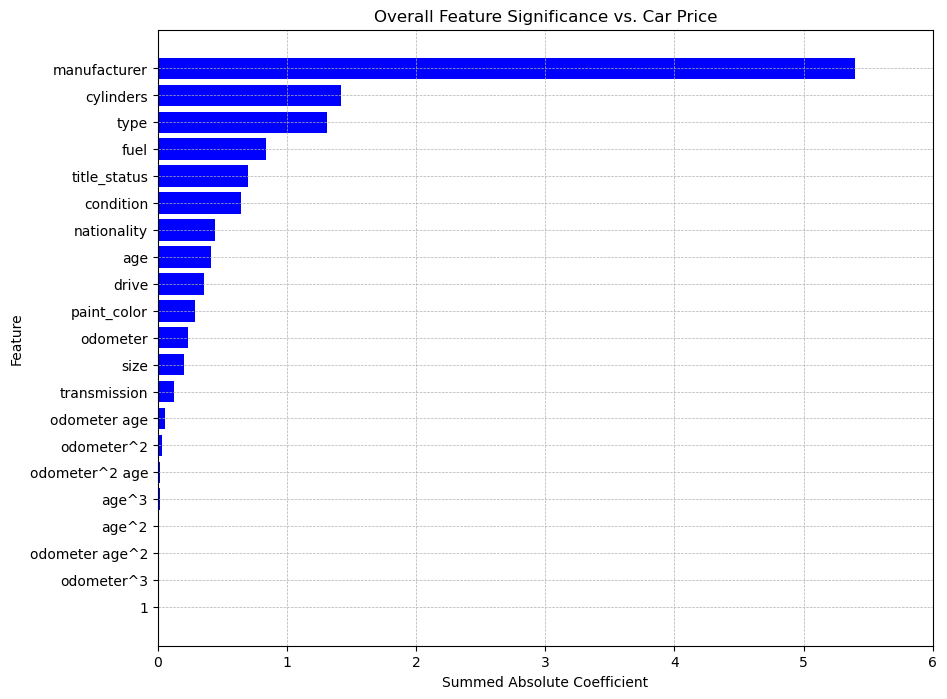

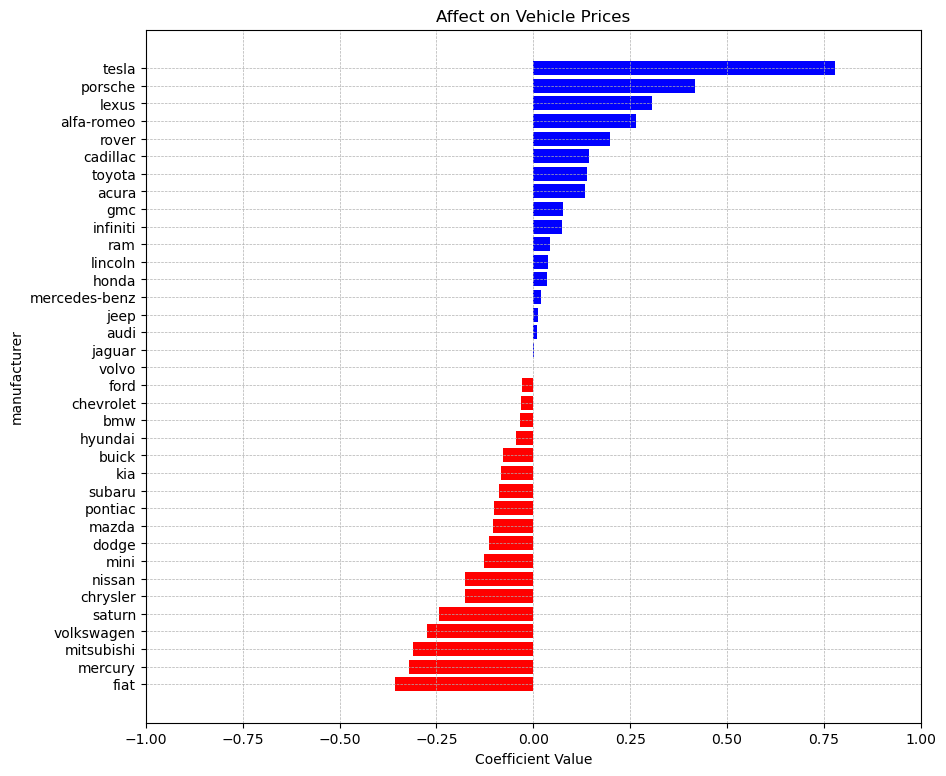

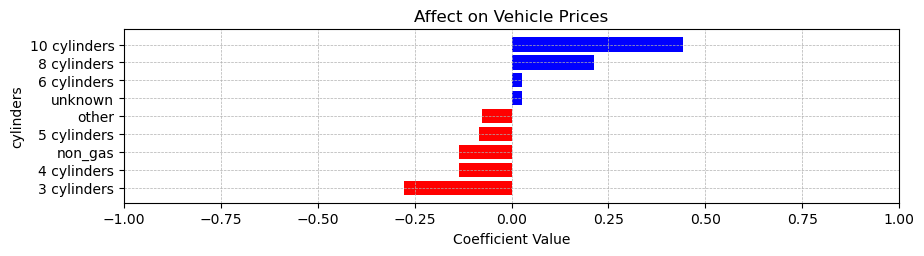

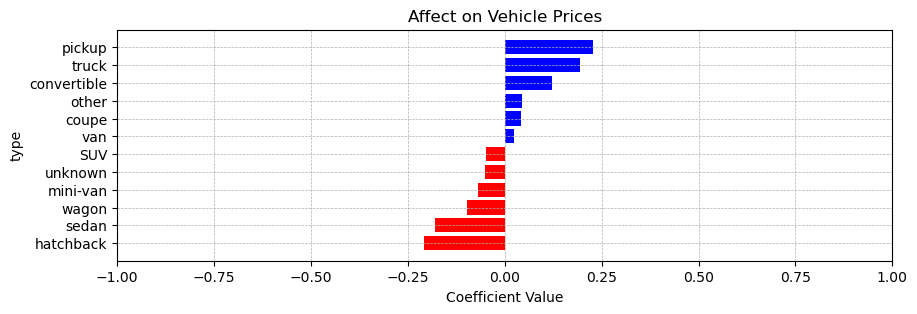

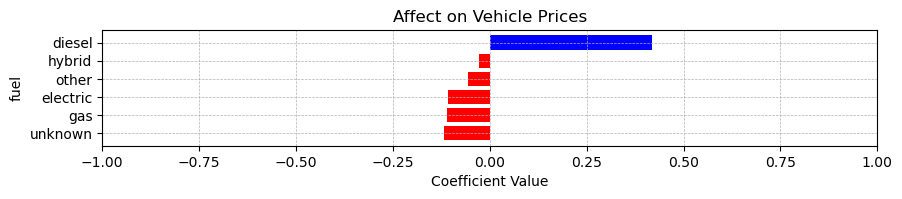

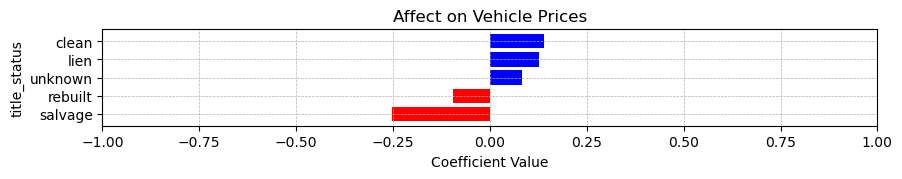

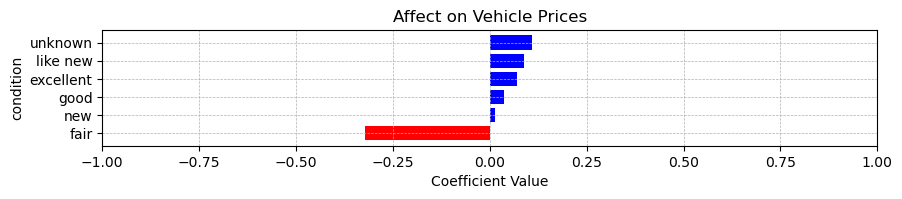

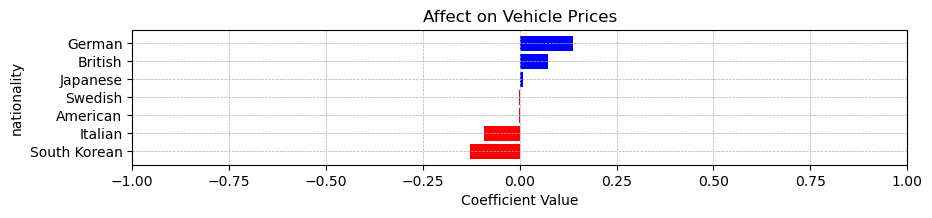

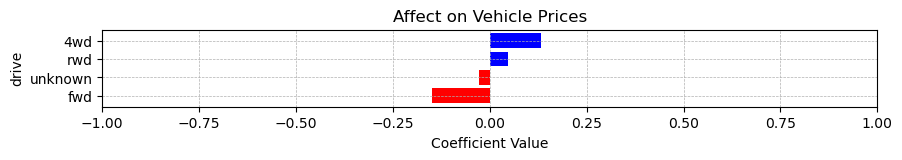

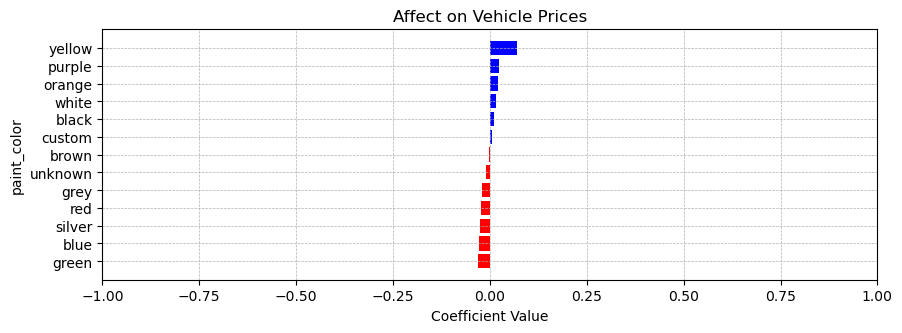

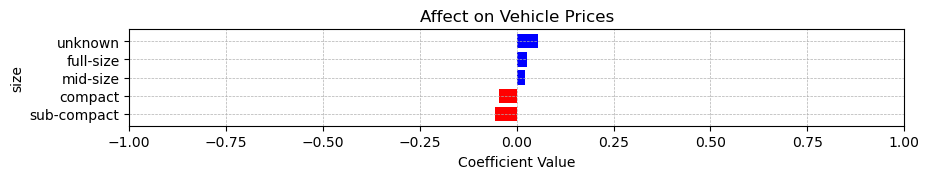

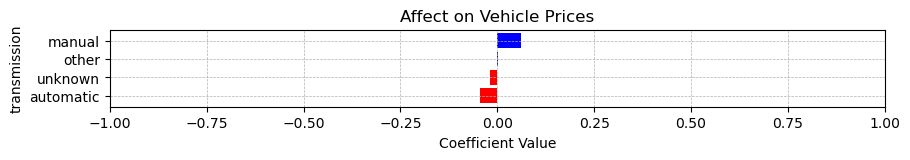

In [49]:
make_plots(preprocessor, 'Ridge Regression', 6, 1)

MSE               = 0.10
R2                = 0.79
Best Alpha        = 0.001
Best Poly Degree  = 3
Best Poly Bias    = True
Best Penalty      = None
Best L1 Ratio     = None
Best N Estimators = None
Best Max Features = None

           Feature  Summed Absolute Coefficient
0     manufacturer                     1.756970
9             type                     1.012686
3             fuel                     0.558560
12             age                     0.405393
7            drive                     0.385111
2        cylinders                     0.356153
11     nationality                     0.290839
5     title_status                     0.281414
1        condition                     0.241592
4         odometer                     0.238372
8             size                     0.085680
6     transmission                     0.072565
10     paint_color                     0.063997
15    odometer age                     0.051569
14      odometer^2                     0.027863
18  odom

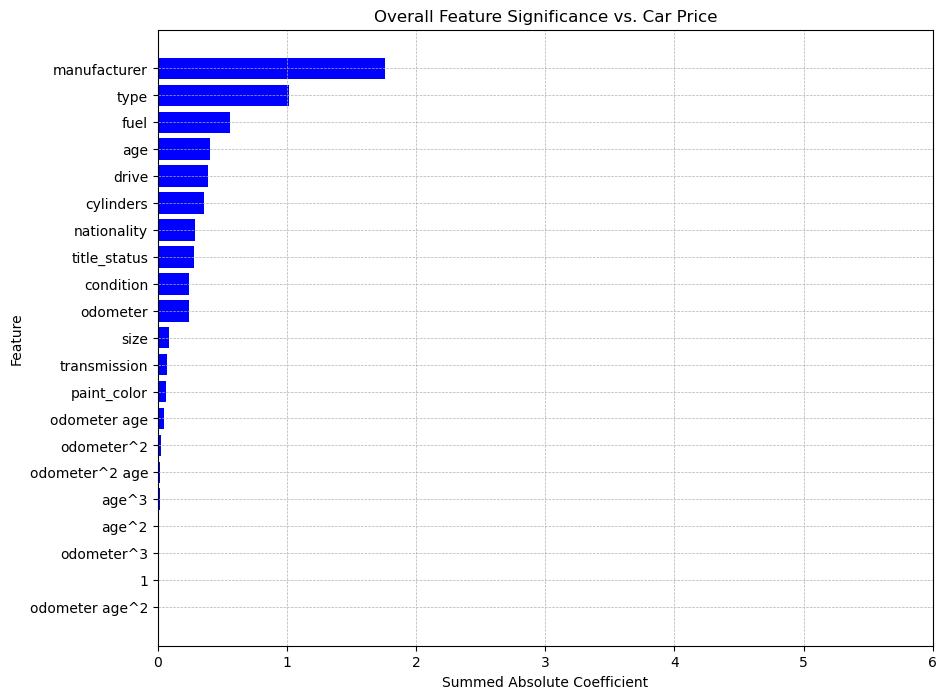

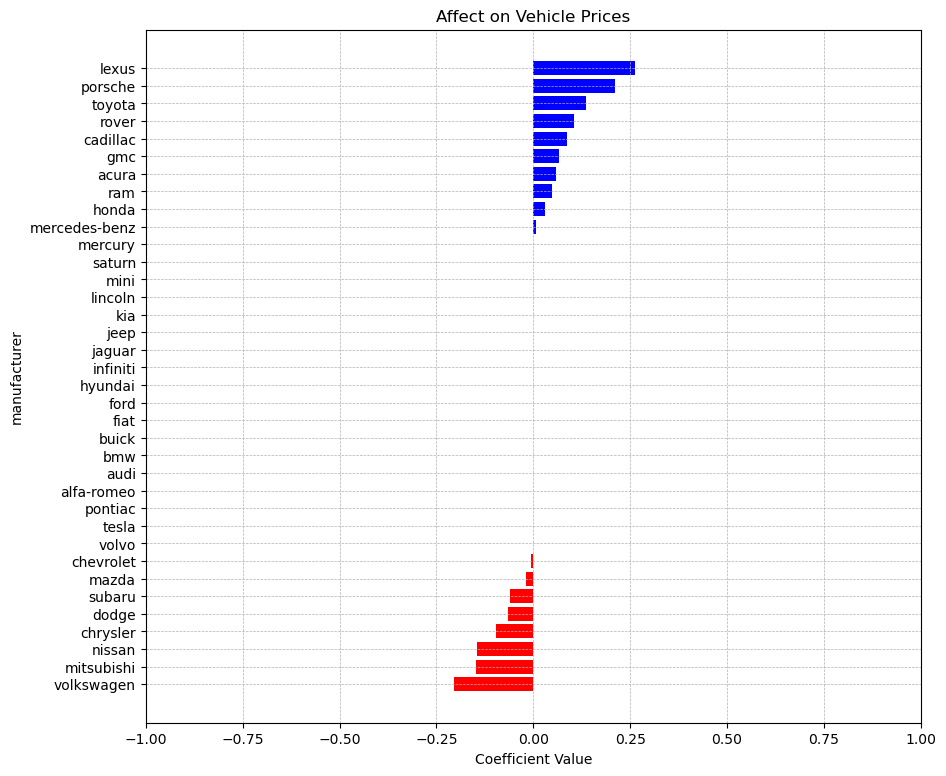

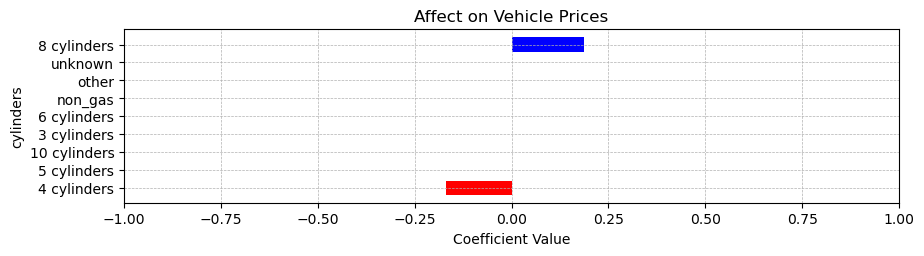

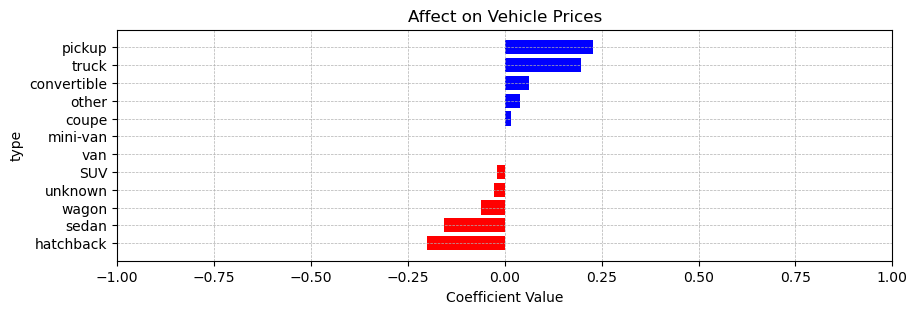

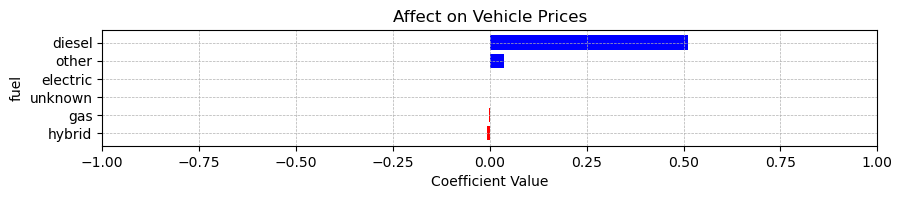

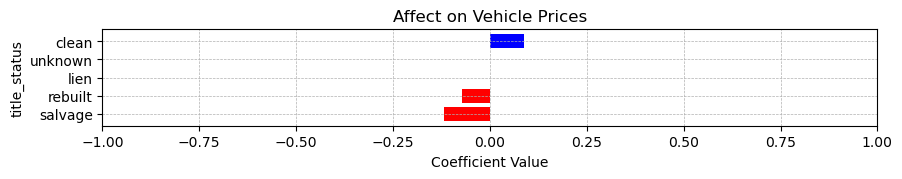

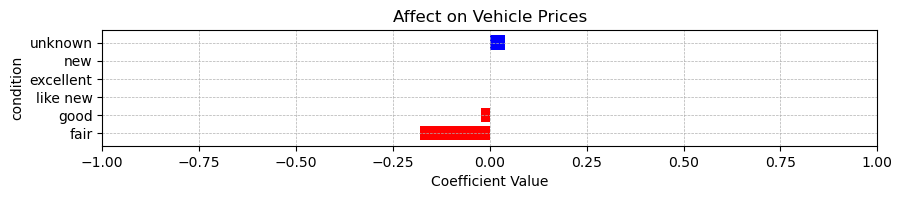

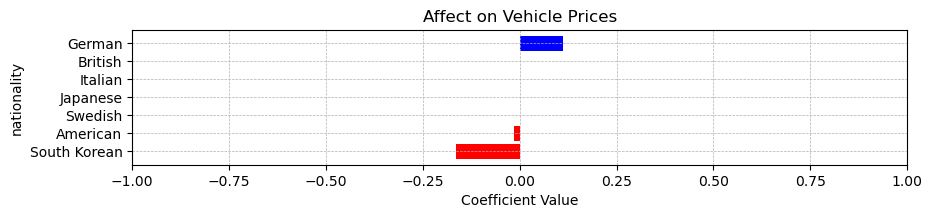

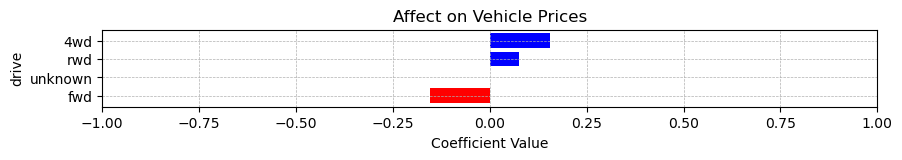

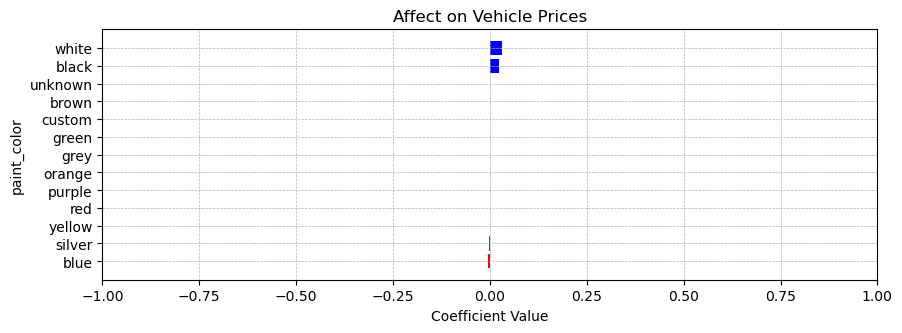

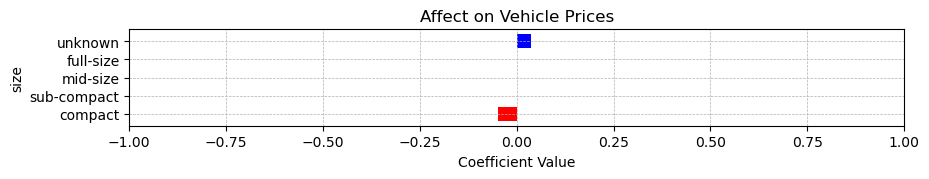

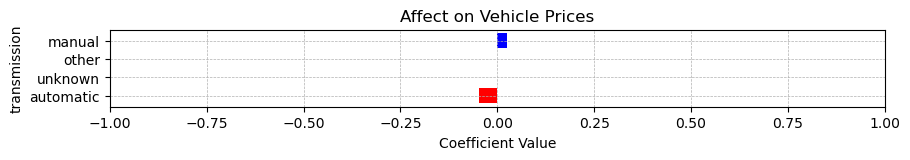

In [50]:
make_plots(preprocessor, 'Lasso Regression', 6, 1)

#-------------------------------------------------------------------------------------------------------------------------------
# CONCLUSIONS:
#-------------------------------------------------------------------------------------------------------------------------------
# Lasso Regression resulted in a lot of coefficients = 0.

MSE               = 0.09
R2                = 0.80
Best Alpha        = 0.001
Best Poly Degree  = None
Best Poly Bias    = None
Best Penalty      = None
Best L1 Ratio     = 0.0
Best N Estimators = None
Best Max Features = None

         Feature  Summed Absolute Coefficient
0   manufacturer                     4.334445
9           type                     1.283730
2      cylinders                     1.071279
3           fuel                     0.799987
5   title_status                     0.594276
1      condition                     0.530533
11   nationality                     0.432214
12           age                     0.375780
7          drive                     0.367668
10   paint_color                     0.242663
4       odometer                     0.218073
8           size                     0.217963
6   transmission                     0.126066
15  odometer age                     0.048944
16         age^2                     0.044616
14    odometer^2                     0

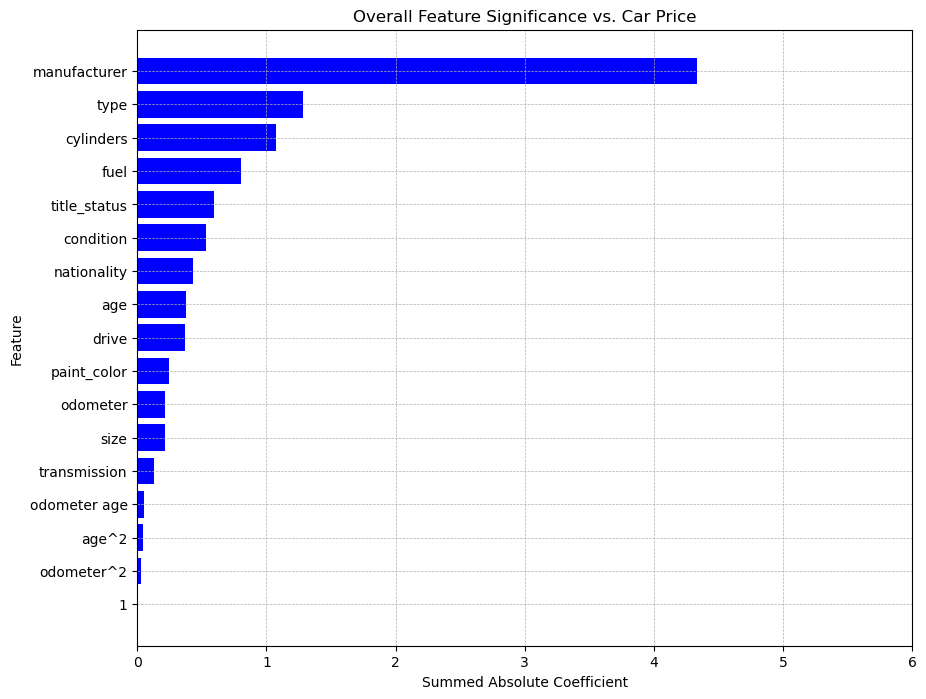

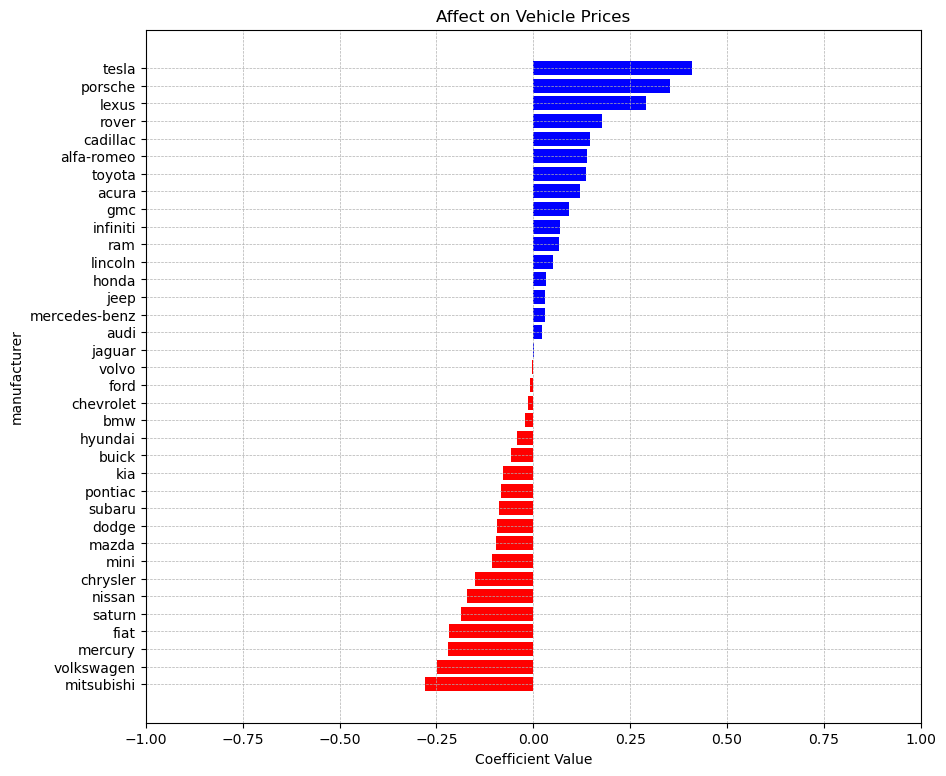

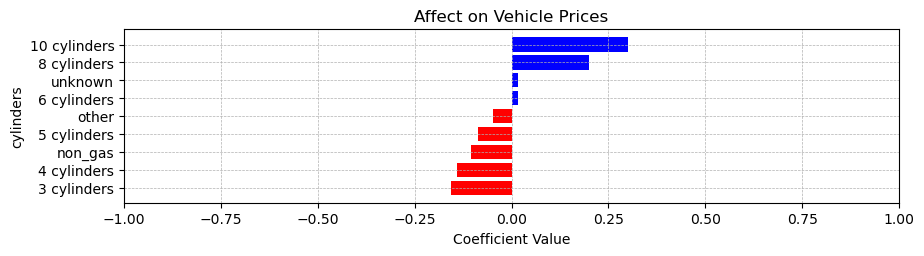

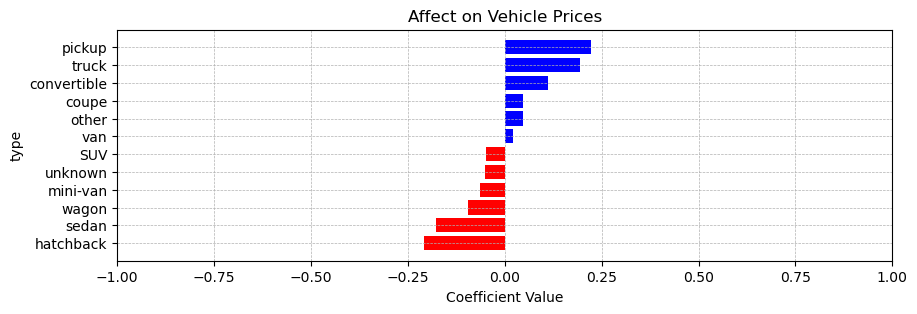

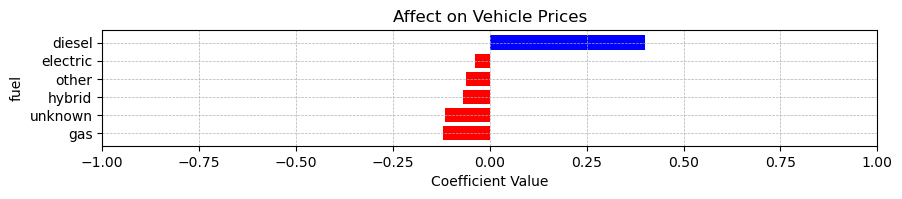

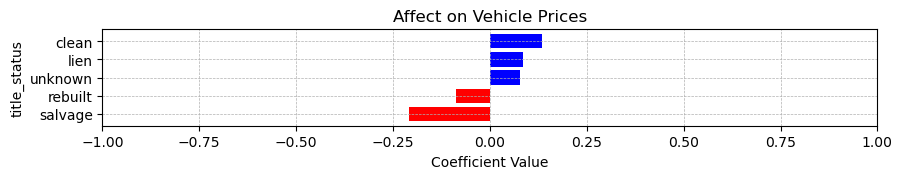

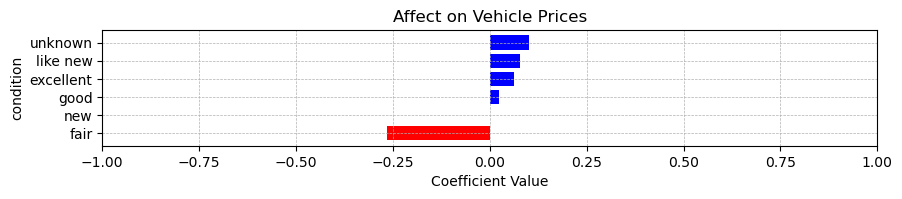

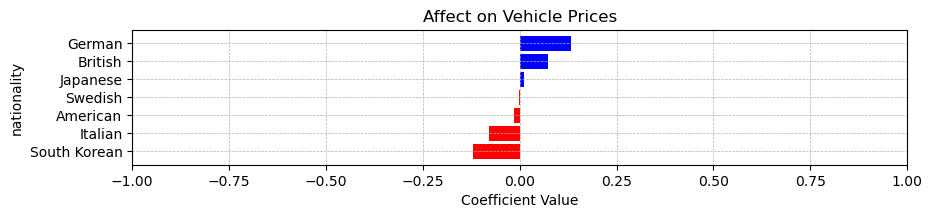

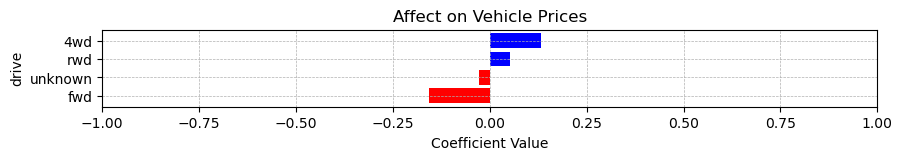

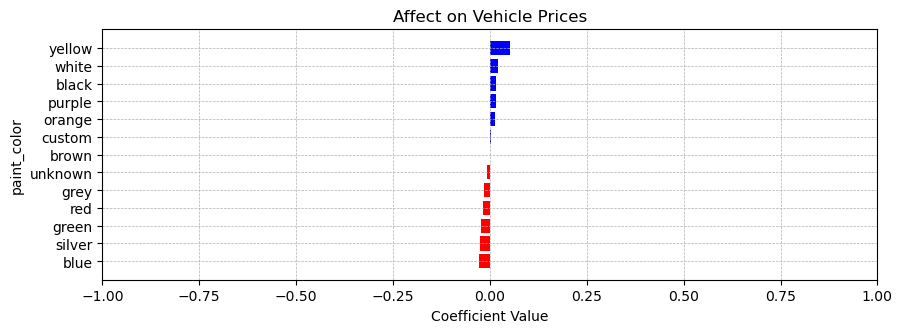

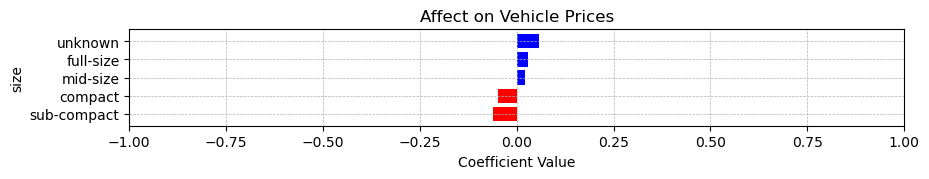

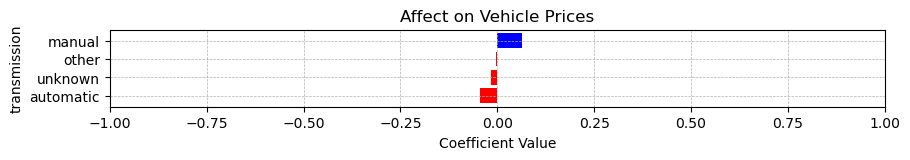

In [54]:
make_plots(preprocessor, 'ElasticNet Regression', 6, 1)

MSE               = 0.10
R2                = 0.80
Best Alpha        = 0.001
Best Poly Degree  = 3
Best Poly Bias    = True
Best Penalty      = elasticnet
Best L1 Ratio     = None
Best N Estimators = None
Best Max Features = None

           Feature  Summed Absolute Coefficient
0     manufacturer                     4.514997
13               1                     3.404888
7            drive                     3.288204
6     transmission                     3.288144
8             size                     3.249345
5     title_status                     3.248223
3             fuel                     3.210437
1        condition                     3.210390
11     nationality                     3.171227
2        cylinders                     3.105997
9             type                     2.976272
10     paint_color                     2.934512
12             age                     0.396894
4         odometer                     0.238173
15    odometer age                     0.057216
14

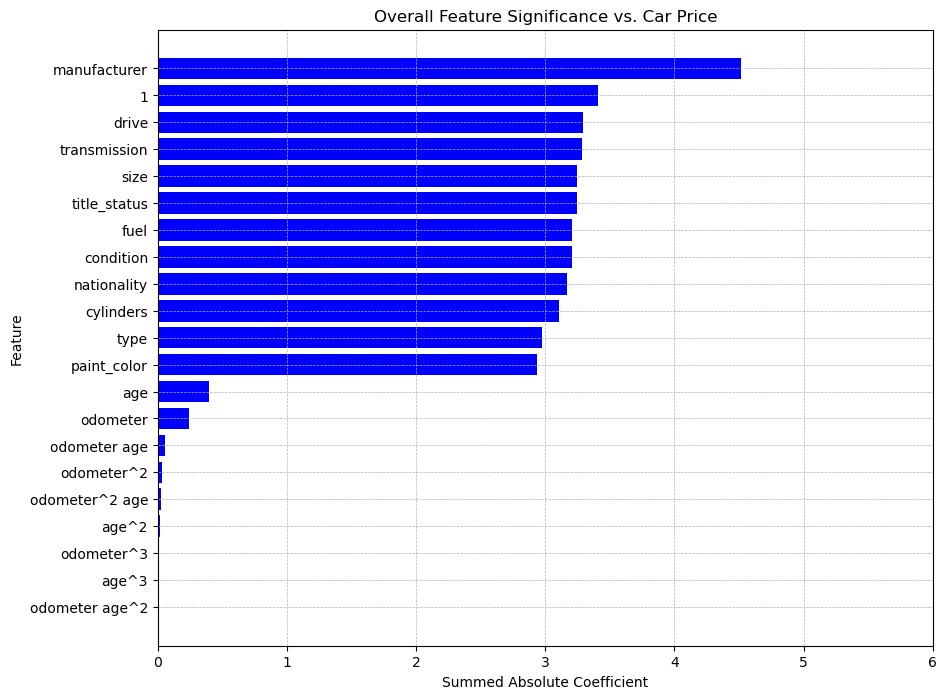

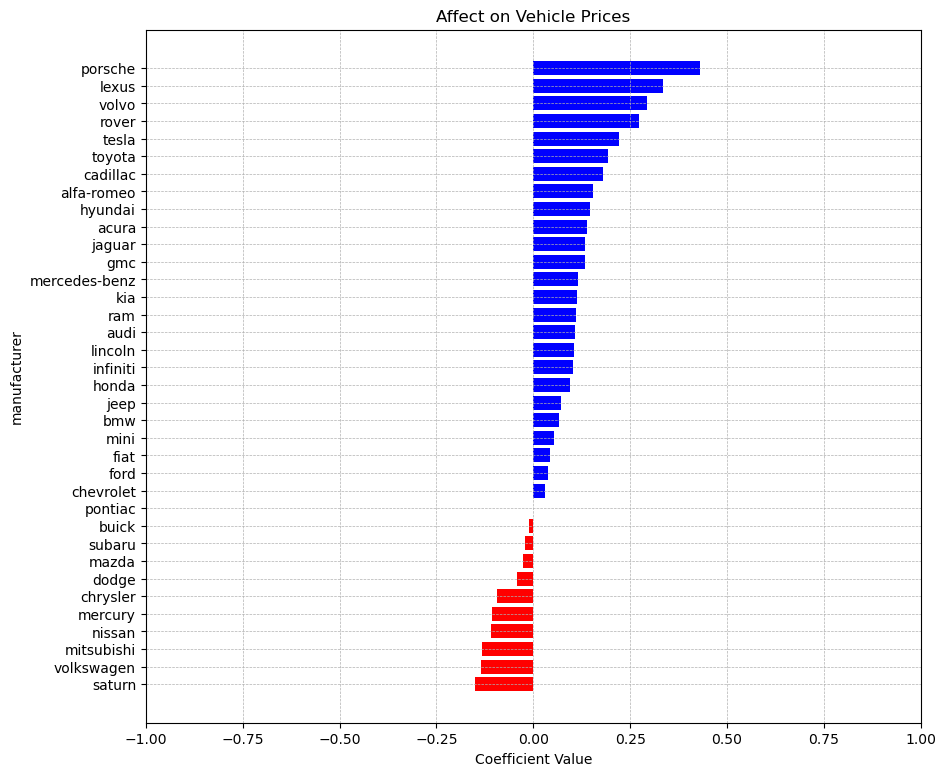

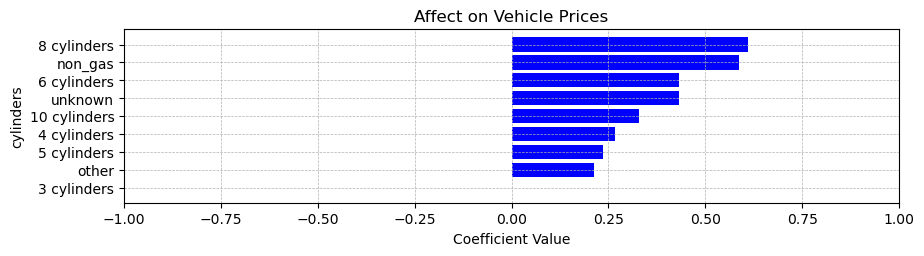

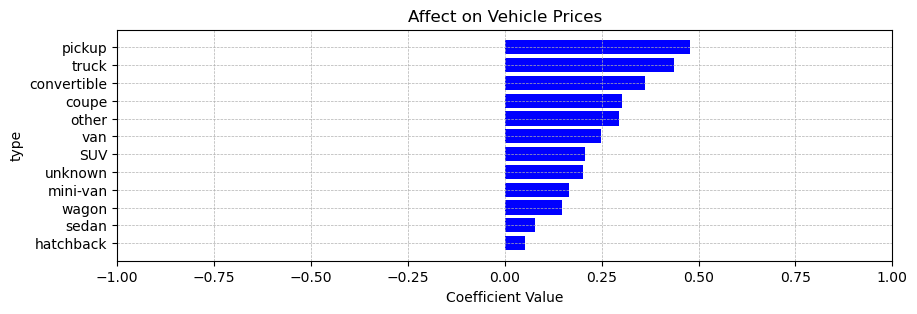

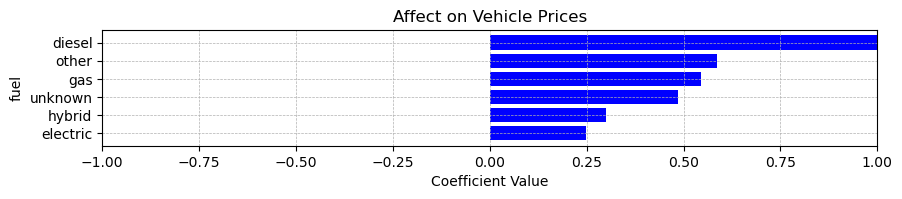

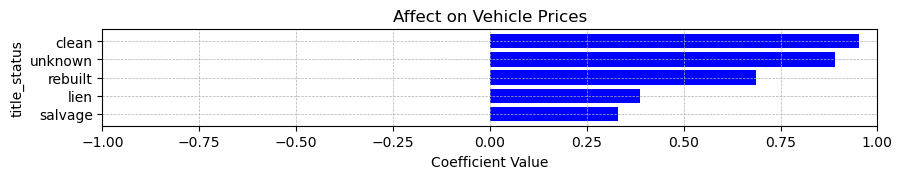

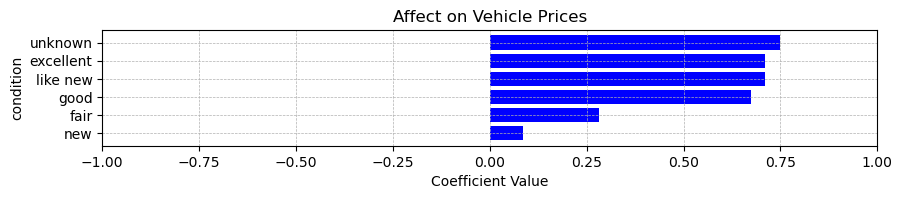

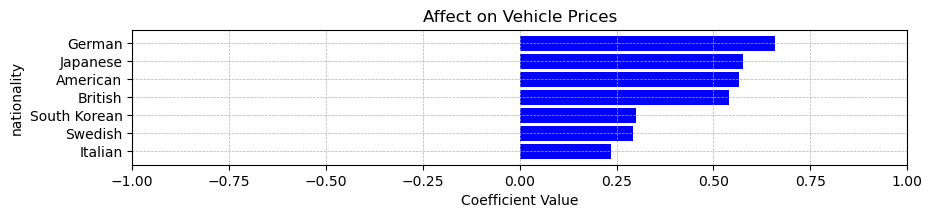

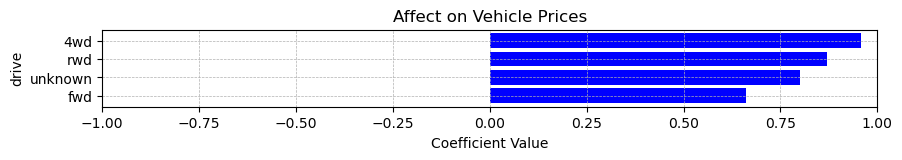

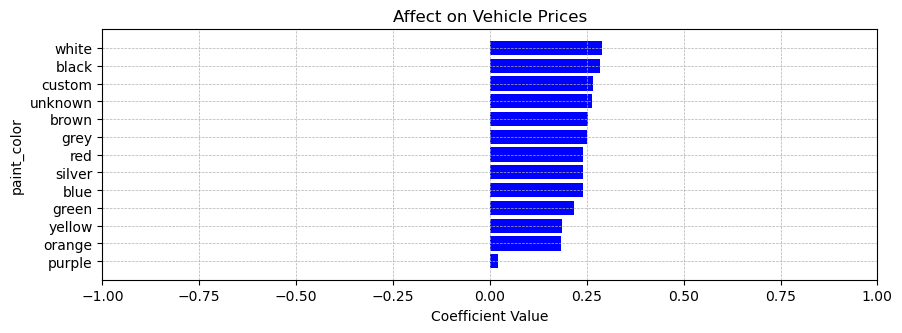

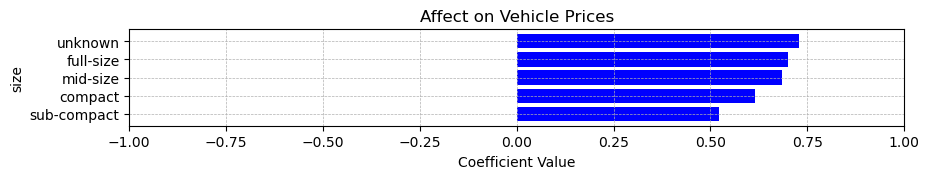

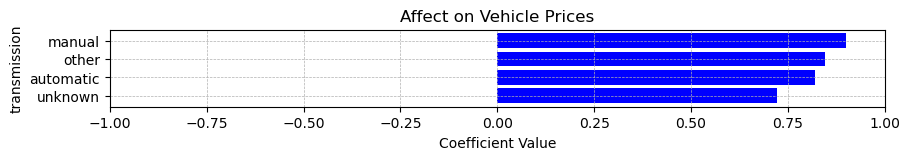

In [51]:
make_plots(preprocessor, 'SGD Regression', 6, 1)

MSE               = 0.08
R2                = 0.84
Best Alpha        = None
Best Poly Degree  = None
Best Poly Bias    = None
Best Penalty      = None
Best L1 Ratio     = None
Best N Estimators = 200
Best Max Features = sqrt

         Feature  Summed Absolute Coefficient
12           age                     0.198916
4       odometer                     0.154947
15  odometer age                     0.087673
7          drive                     0.083173
16         age^2                     0.078810
9           type                     0.072146
14    odometer^2                     0.058294
0   manufacturer                     0.057017
2      cylinders                     0.056241
3           fuel                     0.042027
10   paint_color                     0.026520
11   nationality                     0.023181
1      condition                     0.021727
6   transmission                     0.017143
8           size                     0.016138
5   title_status                     0.

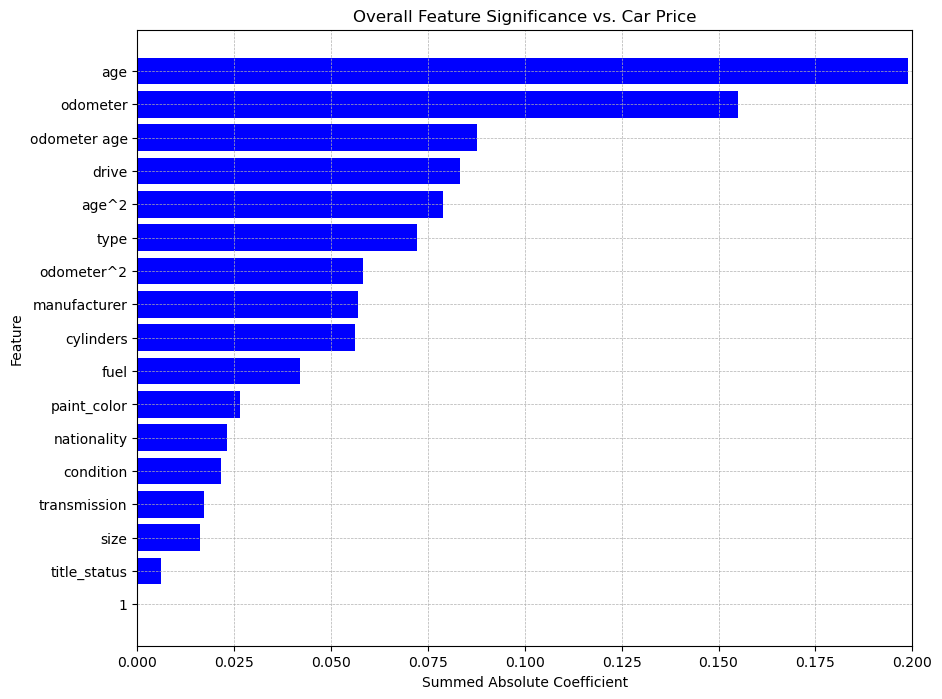

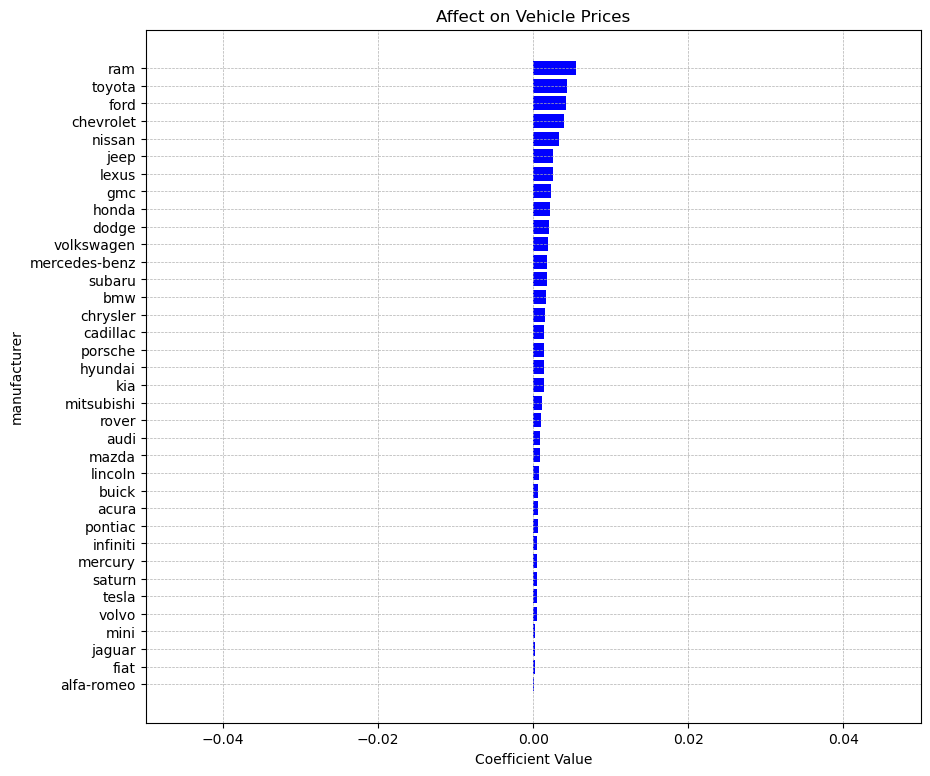

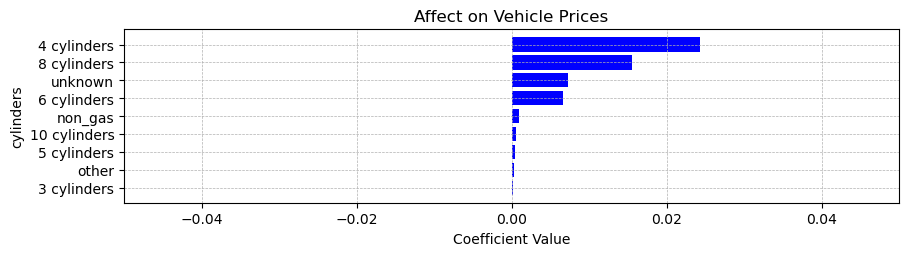

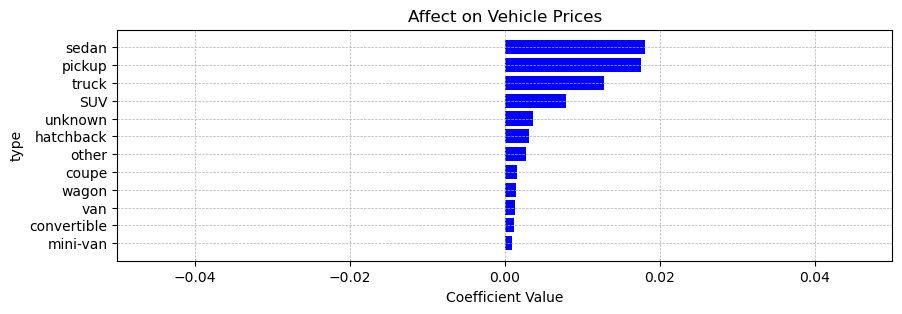

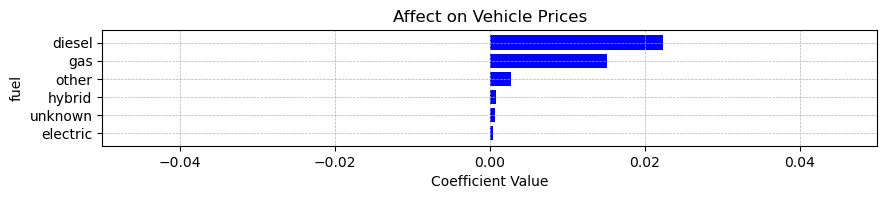

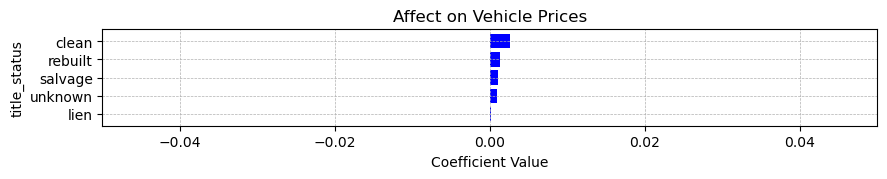

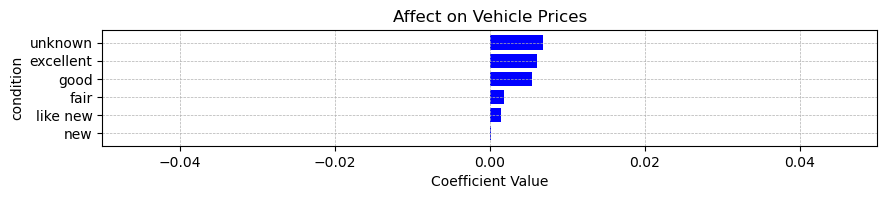

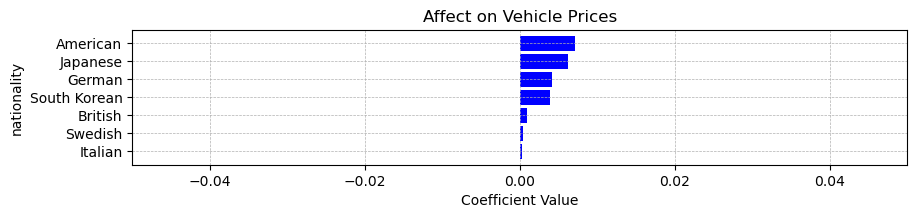

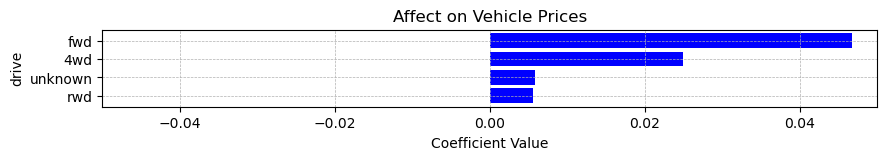

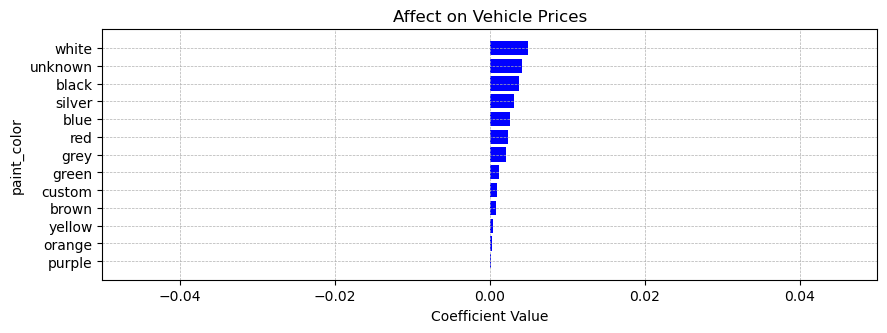

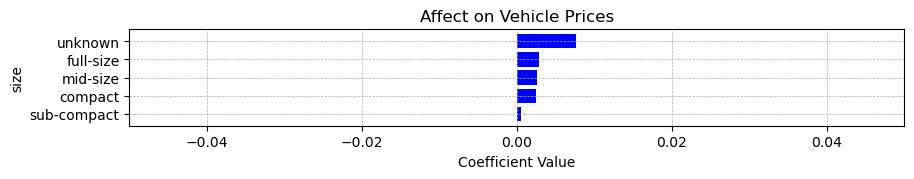

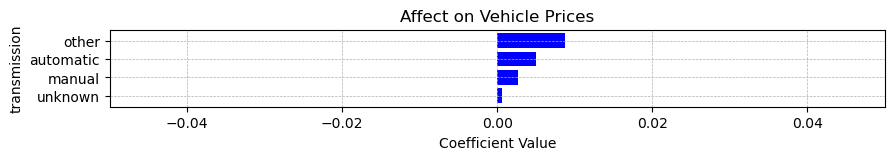

In [53]:
make_plots(preprocessor, 'Random Forest Regression', 0.2, 0.05)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
# The best model resulted from Random Forest Regression, which accounts for 84% of price variance. It is only valid for vehicles
# 1) 0 - 30 years of age, 2) 12K - 325K miles, and 3) Vehicle Prices in the range of $2k - $80k. The conclusions provided below
# are not valid for vehicles outside these ranges.

In [ ]:
# RECOMMENDATIONS:
#
# The sweet spot for maximizing total sales revenue is with vehicles valued between $18k - $80K. Because of market availability,
# most sales will involve vehicles near the lower end of this range. However, higher valued vehicles generally will contribute
# more to profitability and should be prioritized.
#
# The Top10 traded brands in order from greatest to least include: Ford, Chevrolet, Toyota, Honda, Nissan, Jeep, RAM, BMW, GMC,
# and Dodge. However, in order of retained value from greatest to least, they are: Toyota, GMC, RAM, Honda, Jeep, Ford, 
# Chevrolet, BMW, Dodge, and Nissan. The regression analysis identifies all of these makes as better than average in their
# ability to retain resale value, so they should be prioritized.
#
# Prioritize features in the following order:  1) age,                2) odometer,       3) drive,         4) type (body style), 
#                                              5) cylinders,          6) manufacturer,   7) fuel,          8) paint color,
#                                              9) nationality,       10) condition,     11) vehicle size, 12) transmission,
#                                             13) title status
#
#
# 1. AGE:             Understand that vehicle resale value diminishes with age up to 30 years. Vehicles older than 30 years
#                     of age work off a different pricing model, so do not automatically discount vehicles greater than 30 years
#                     of age. Also, the relationship between age and price is non-linear. Vehicle value initially drops off
#                     steeply and levels off over time. 
#
# 2. ODOMETER:        Vehicle value diminishes with odometer mileage up to 325k miles. Also, the relationship between odometer
#                     mileage and price is non-linear. Vehicle value initially drops off steeply and levels off over time. 
#
# 3. DRIVE TRAIN:     Prioritize (from best to worste): FWD, AWD, and then RWD
#
# 4. TYPE:            Focus on popular vehicle types (body styles)
#
#                     Prioritize:    Sedans, Pick-ups, SUVs, and Hatchbacks
#                     De-Prioritize: Mini Vans, Convertibles, Vans, Wagons, and Coups
#
# 5. CYLINDER COUNT:  For gas powered vehicles, prioritize cylinder counts in the mid-range (e.g. 4, 6, 8). Avoid vehicles
#                     with odd cylinder counts (e.g. 3, 5).
#
# 6. MANUFACTURER:    Focus on valued brands and models: Prioritize vehicles known for reliability and retained resale value.
#
#                     Prioritize: Ford, Chevrolet, Toyota, Honda, Nissan, Jeep, RAM, BMW, GMC, and Dodge
#                     Avoid:      Alpha-Romeo, Jaguar, Fiat, Volvo, Saturn, Infiniti, Mercury, Tesla*, Acura, Lincoln
#
#                     *NOTE: Tesla is a relatively young brand. Although the analysis identifies it as a make to avoid, there
#                     are likely other dynamics at play that require further study. Vehicles depreciate more rapidly in their
#                     first few years. Given the likely lack of older Tesla vehicles on the road, the analysis is likely
#                     penalizing Tesla for retained value becuase it is a newer brand.
#
# 7. FUEL TYPE:       Prioritize (from best to worste): Diesel, Gas, Hybrid, Electric
#
# 8. PAINT COLOR:     Prioritize neutral paint colors.
#                     Colors (from best to worst): White, Black, Silver, blue, Red, Grey, Green, Brown, Yellow, Orange, Purple
#
# 9. NATIONALITY:     Prioritize: American, Japanese, German, and South Korean brands.
#                     De-Prioritize: Italian, Swedish, and British brands.
#
# 10. CONDITION:      Prioritize vehicles in better condition, but realize that 'new' or 'like new' vehicles that are younger
#                     will still be steeply discounted because they've been used.
#
# 11. SIZE:           Avoid sub-compact vehicles. All other sizes similarly retain value.
#
# 12. TRANSMISSION:   Manual is preferred over automatic.
#
# 13. TITLE STATUS:   Stick with 'Clean' titles.
#
# NEXT STEPS:
#   1) Investigate the vehicle sales price round-down effect. Sales revenue data indicates a common practice of rounding
#      down final sales prices to the nearest $1K increment and even more so to the nearest $5K increment. This may represent
#      buyer psychology where sales prices are rounded down to close deals more quickly. However, the pattern could represent
#      dealership biases in vehicle pricing that are leading to lost revenue.
#   2) Complete a residuals analysis to determine if there are any remaining patterns in the data that the model doesn't
#      account for
#   3) Compare these findings with industry benchmarks or trends to validate the recommendations.
#   4) Implement more extensive cleaning of the dataset based on the content provided in the 'model' column.
#   5) Explore the impact of modern features like advanced safety technology (e.g. abs braking, air bags), infotainment
#      systems, or electric/hybrid engines and drive trains on resale value.
#   6) Explore how younger brands like Tesla are prioritized by the model to ensure their resale values are accurately
#      accounted for.
#   7) Look at how consumer knowledge and understanding of new technologies, such as hybrid and electric vehicles, impacts
#      retained value.